# Project Flight Price Predicition:

Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.


Size of training set: 10683 records


Size of test set: 2671 records


FEATURES:
Airline: The name of the airline.


Date_of_Journey: The date of the journey


Source: The source from which the service begins.


Destination: The destination where the service ends.


Route: The route taken by the flight to reach the destination.


Dep_Time: The time when the journey starts from the source.


Arrival_Time: Time of arrival at the destination.


Duration: Total duration of the flight.


Total_Stops: Total stops between the source and destination.


Additional_Info: Additional information about the flight


Price: The price of the ticket

In [1]:
# Importing all required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing training data into the jupyter notebook
df=pd.read_excel('Data_Train.xlsx')
df

Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3            CCU → NAG → BLR    18:05         23:30   5h 25m      1 stop   
4            BLR → NAG → DEL    16:50         21:35   4h 45m      1 stop   
...                      ...      ...           ...      ...         ...   
10678              CCU → BLR    19:55         22:25   2h 30m    non-stop   
10679              CCU → BLR    20:45         23:20   2h 35m    non-stop   
10680              BLR → DEL    08:20         11:20       3h    non-stop   
10681              BLR → DEL    11:30         14:10   2h 40m    non-stop   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m     2 stops   

      Additional_Info  Price  
0             No info   3897  
1             No info   7662  
2             No info  13882  
3             No info   6218  
4             No info  13302  
...               ...    ...  
10678         No info   4107  
10679         No info   4145  
10680         No info   7229  
10681         No info  12648  
10682         No info  11753  

[10683 rows x 11 columns]

* Here we can see training dataset.

In [3]:
# importing testing dataset
df_test= pd.read_excel('Test_set.xlsx')
df_test

Airline Date_of_Journey    Source Destination  \
0           Jet Airways       6/06/2019     Delhi      Cochin   
1                IndiGo      12/05/2019   Kolkata    Banglore   
2           Jet Airways      21/05/2019     Delhi      Cochin   
3     Multiple carriers      21/05/2019     Delhi      Cochin   
4              Air Asia      24/06/2019  Banglore       Delhi   
...                 ...             ...       ...         ...   
2666          Air India       6/06/2019   Kolkata    Banglore   
2667             IndiGo      27/03/2019   Kolkata    Banglore   
2668        Jet Airways       6/03/2019     Delhi      Cochin   
2669          Air India       6/03/2019     Delhi      Cochin   
2670  Multiple carriers      15/06/2019     Delhi      Cochin   

                Route Dep_Time  Arrival_Time Duration Total_Stops  \
0     DEL → BOM → COK    17:30  04:25 07 Jun  10h 55m      1 stop   
1     CCU → MAA → BLR    06:20         10:20       4h      1 stop   
2     DEL → BOM → COK    19:15  19:00 22 May  23h 45m      1 stop   
3     DEL → BOM → COK    08:00         21:00      13h      1 stop   
4           BLR → DEL    23:55  02:45 25 Jun   2h 50m    non-stop   
...               ...      ...           ...      ...         ...   
2666  CCU → DEL → BLR    20:30  20:25 07 Jun  23h 55m      1 stop   
2667        CCU → BLR    14:20         16:55   2h 35m    non-stop   
2668  DEL → BOM → COK    21:50  04:25 07 Mar   6h 35m      1 stop   
2669  DEL → BOM → COK    04:00         19:15  15h 15m      1 stop   
2670  DEL → BOM → COK    04:55         19:15  14h 20m      1 stop   

                  Additional_Info  
0                         No info  
1                         No info  
2     In-flight meal not included  
3                         No info  
4                         No info  
...                           ...  
2666                      No info  
2667                      No info  
2668                      No info  
2669                      No info  
2670                      No info  

[2671 rows x 10 columns]

* Testing dataset :- here we can see testing dataset. we can see that here there area 10 columns instead of 11 as training data. one missing column then training is price. so, we will use this data and predict prices after finalizing model using training data.As our target is to predict the prices in the testing dataset. this project will belong to Regression problem and we will take all regression algorithms to solve this problem.
    

# Using Training Dataset as our primary DataFrame( for training and model building):

# Exploratory Data Analysis(EDA):

In [4]:
df.shape

(10683, 11)

* we can see that there are 10,683 rows present in 11 columns of the dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


* Here we can observe that all the columns have non null values present except Route and Total_stops which have 1 null value each.

In [6]:
# lets check unique values in each column of this dataset
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [7]:
# Lets check the datatype of each column
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

* Here we can see that all the columns present in the dataset has datatype object and only price is having integer datatype.
* Here there is a column name Date of Journey which is also present in object formant we need to change its format and to do that we will split date, time and year sperately.

In [8]:
# lets reconfirm presence of null values in this dataset
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

* here we are confirmed of presence of null value each in column Route and Total_stops

In [9]:
# here there is no null or NaN values but lets check whether there are any empty spaces present in the dataset or not?
df.loc[df['Price'] ==" "]

Empty DataFrame
Columns: [Airline, Date_of_Journey, Source, Destination, Route, Dep_Time, Arrival_Time, Duration, Total_Stops, Additional_Info, Price]
Index: []

Here we can see that there are no missing data in this Dataset.

In [10]:
# checking values in all the columns present in this dataset
for i in df.columns:
    print (df[i].value_counts())
    print('-------------------------------------------------------')

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
-------------------------------------------------------
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     21

* value count of each column in this training dataset.

In [11]:
# lets now remove the NaN Values present in the dataset
df["Route"]=df["Route"].fillna(df["Route"].mode()[0])
df["Total_Stops"]=df["Total_Stops"].fillna(df["Total_Stops"].mode()[0])

* These 2 were object rows or categorical rows thats why we used mode to replace the null values present.

In [12]:
# lets check Null values again, to check whether we have successfully filled mode value to the missing data or not.
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

* Here we can see that now there are no null values present in the dataset now.
* Here we observe that not only Date_of_Journey, but also Dep_Time and Arrival_time() are also having object dtype. lets convert dtype of these three to datetime dtype.

In [13]:
# now lets convert datatype of column date_of_journey 
df["Date_of_Journey"]=pd.to_datetime(df["Date_of_Journey"])
df["Dep_Time"]= pd.to_datetime(df["Dep_Time"])
df["Arrival_Time"]=pd.to_datetime(df["Arrival_Time"])

In [14]:
# lets check the Datatypes once more to confirm whether we have succesfully changed the Dtype or not?
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

* Here we can see that we have successfully changed the datatype from object to datetime

In [15]:
# Lets Split Date_of_Journey and extract Day, month and year from it.
# Day
df["Day"]=pd.to_datetime(df.Date_of_Journey,format= "%d%m%y").dt.day
#Month
df["Month"]=pd.to_datetime(df.Date_of_Journey,format="%d%m%y").dt.month
#year
df["Year"]=pd.to_datetime(df.Date_of_Journey, format="%d%m%y").dt.year

In [16]:
# Now lets drop the Date_of_journey column from the dataset to avoid duplicate data
df=df.drop(["Date_of_Journey"], axis=1)

In [17]:
df

Airline    Source Destination                  Route  \
0           IndiGo  Banglore   New Delhi              BLR → DEL   
1        Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2      Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK   
3           IndiGo   Kolkata    Banglore        CCU → NAG → BLR   
4           IndiGo  Banglore   New Delhi        BLR → NAG → DEL   
...            ...       ...         ...                    ...   
10678     Air Asia   Kolkata    Banglore              CCU → BLR   
10679    Air India   Kolkata    Banglore              CCU → BLR   
10680  Jet Airways  Banglore       Delhi              BLR → DEL   
10681      Vistara  Banglore   New Delhi              BLR → DEL   
10682    Air India     Delhi      Cochin  DEL → GOI → BOM → COK   

                 Dep_Time        Arrival_Time Duration Total_Stops  \
0     2021-12-23 22:20:00 2021-03-22 01:10:00   2h 50m    non-stop   
1     2021-12-23 05:50:00 2021-12-23 13:15:00   7h 25m     2 stops   
2     2021-12-23 09:25:00 2021-06-10 04:25:00      19h     2 stops   
3     2021-12-23 18:05:00 2021-12-23 23:30:00   5h 25m      1 stop   
4     2021-12-23 16:50:00 2021-12-23 21:35:00   4h 45m      1 stop   
...                   ...                 ...      ...         ...   
10678 2021-12-23 19:55:00 2021-12-23 22:25:00   2h 30m    non-stop   
10679 2021-12-23 20:45:00 2021-12-23 23:20:00   2h 35m    non-stop   
10680 2021-12-23 08:20:00 2021-12-23 11:20:00       3h    non-stop   
10681 2021-12-23 11:30:00 2021-12-23 14:10:00   2h 40m    non-stop   
10682 2021-12-23 10:55:00 2021-12-23 19:15:00   8h 20m     2 stops   

      Additional_Info  Price  Day  Month  Year  
0             No info   3897   24      3  2019  
1             No info   7662    5      1  2019  
2             No info  13882    6      9  2019  
3             No info   6218    5     12  2019  
4             No info  13302    3      1  2019  
...               ...    ...  ...    ...   ...  
10678         No info   4107    4      9  2019  
10679         No info   4145   27      4  2019  
10680         No info   7229   27      4  2019  
10681         No info  12648    3      1  2019  
10682         No info  11753    5      9  2019  

[10683 rows x 13 columns]

* Here we can see in the table that we have successfully dropped the column Date_of_journey.

In [18]:
# lets filter duration using Dep_Time and Arrival_Time
time=(df["Arrival_Time"]-df["Dep_Time"])
time_taken=list()
for i in range(len(time)):
    duration=time.iloc[i].seconds/3600
    time_taken.append(duration)
df["Duration"]=time_taken

In [19]:

# Now lets split Dep_Time column into two columns Dep_hr and Dep_min
#Hours
df["dep_hr"]=pd.to_datetime(df["Dep_Time"]).dt.hour

# minutes
df["dep_m"]=pd.to_datetime(df["Dep_Time"]).dt.minute

In [20]:
# lets drop Dep_Time to avoid duplicate data.
df=df.drop(["Dep_Time"],axis=1)

In [21]:
df

Airline    Source Destination                  Route  \
0           IndiGo  Banglore   New Delhi              BLR → DEL   
1        Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2      Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK   
3           IndiGo   Kolkata    Banglore        CCU → NAG → BLR   
4           IndiGo  Banglore   New Delhi        BLR → NAG → DEL   
...            ...       ...         ...                    ...   
10678     Air Asia   Kolkata    Banglore              CCU → BLR   
10679    Air India   Kolkata    Banglore              CCU → BLR   
10680  Jet Airways  Banglore       Delhi              BLR → DEL   
10681      Vistara  Banglore   New Delhi              BLR → DEL   
10682    Air India     Delhi      Cochin  DEL → GOI → BOM → COK   

             Arrival_Time   Duration Total_Stops Additional_Info  Price  Day  \
0     2021-03-22 01:10:00   2.833333    non-stop         No info   3897   24   
1     2021-12-23 13:15:00   7.416667     2 stops         No info   7662    5   
2     2021-06-10 04:25:00  19.000000     2 stops         No info  13882    6   
3     2021-12-23 23:30:00   5.416667      1 stop         No info   6218    5   
4     2021-12-23 21:35:00   4.750000      1 stop         No info  13302    3   
...                   ...        ...         ...             ...    ...  ...   
10678 2021-12-23 22:25:00   2.500000    non-stop         No info   4107    4   
10679 2021-12-23 23:20:00   2.583333    non-stop         No info   4145   27   
10680 2021-12-23 11:20:00   3.000000    non-stop         No info   7229   27   
10681 2021-12-23 14:10:00   2.666667    non-stop         No info  12648    3   
10682 2021-12-23 19:15:00   8.333333     2 stops         No info  11753    5   

       Month  Year  dep_hr  dep_m  
0          3  2019      22     20  
1          1  2019       5     50  
2          9  2019       9     25  
3         12  2019      18      5  
4          1  2019      16     50  
...      ...   ...     ...    ...  
10678      9  2019      19     55  
10679      4  2019      20     45  
10680      4  2019       8     20  
10681      1  2019      11     30  
10682      9  2019      10     55  

[10683 rows x 14 columns]

In [22]:
# now lets split Arrival time into hours and minutes
#hours
df["arr_hr"]=pd.to_datetime(df["Arrival_Time"]).dt.hour
#minutes
df["arr_m"]=pd.to_datetime(df["Arrival_Time"]).dt.minute

In [23]:
# lets drop Arrival_time to avoid duplicate data
df=df.drop(["Arrival_Time"],axis=1)
df

Airline    Source Destination                  Route   Duration  \
0           IndiGo  Banglore   New Delhi              BLR → DEL   2.833333   
1        Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7.416667   
2      Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK  19.000000   
3           IndiGo   Kolkata    Banglore        CCU → NAG → BLR   5.416667   
4           IndiGo  Banglore   New Delhi        BLR → NAG → DEL   4.750000   
...            ...       ...         ...                    ...        ...   
10678     Air Asia   Kolkata    Banglore              CCU → BLR   2.500000   
10679    Air India   Kolkata    Banglore              CCU → BLR   2.583333   
10680  Jet Airways  Banglore       Delhi              BLR → DEL   3.000000   
10681      Vistara  Banglore   New Delhi              BLR → DEL   2.666667   
10682    Air India     Delhi      Cochin  DEL → GOI → BOM → COK   8.333333   

      Total_Stops Additional_Info  Price  Day  Month  Year  dep_hr  dep_m  \
0        non-stop         No info   3897   24      3  2019      22     20   
1         2 stops         No info   7662    5      1  2019       5     50   
2         2 stops         No info  13882    6      9  2019       9     25   
3          1 stop         No info   6218    5     12  2019      18      5   
4          1 stop         No info  13302    3      1  2019      16     50   
...           ...             ...    ...  ...    ...   ...     ...    ...   
10678    non-stop         No info   4107    4      9  2019      19     55   
10679    non-stop         No info   4145   27      4  2019      20     45   
10680    non-stop         No info   7229   27      4  2019       8     20   
10681    non-stop         No info  12648    3      1  2019      11     30   
10682     2 stops         No info  11753    5      9  2019      10     55   

       arr_hr  arr_m  
0           1     10  
1          13     15  
2           4     25  
3          23     30  
4          21     35  
...       ...    ...  
10678      22     25  
10679      23     20  
10680      11     20  
10681      14     10  
10682      19     15  

[10683 rows x 15 columns]

* here we have Successfully dropped the columns Dep_Time and Arrival_Time

After splitting the data now we have 15 columns with as many rows as compared to 13 rows previously.

In [24]:
df.head()

Airline    Source Destination                  Route   Duration  \
0       IndiGo  Banglore   New Delhi              BLR → DEL   2.833333   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7.416667   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK  19.000000   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR   5.416667   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL   4.750000   

  Total_Stops Additional_Info  Price  Day  Month  Year  dep_hr  dep_m  arr_hr  \
0    non-stop         No info   3897   24      3  2019      22     20       1   
1     2 stops         No info   7662    5      1  2019       5     50      13   
2     2 stops         No info  13882    6      9  2019       9     25       4   
3      1 stop         No info   6218    5     12  2019      18      5      23   
4      1 stop         No info  13302    3      1  2019      16     50      21   

   arr_m  
0     10  
1     15  
2     25  
3     30  
4     35

In [25]:
df.tail(10)

Airline    Source Destination                  Route  \
10673        Jet Airways     Delhi      Cochin  DEL → AMD → BOM → COK   
10674        Jet Airways  Banglore   New Delhi        BLR → BOM → DEL   
10675          Air India    Mumbai   Hyderabad              BOM → HYD   
10676  Multiple carriers     Delhi      Cochin        DEL → BOM → COK   
10677           SpiceJet  Banglore       Delhi              BLR → DEL   
10678           Air Asia   Kolkata    Banglore              CCU → BLR   
10679          Air India   Kolkata    Banglore              CCU → BLR   
10680        Jet Airways  Banglore       Delhi              BLR → DEL   
10681            Vistara  Banglore   New Delhi              BLR → DEL   
10682          Air India     Delhi      Cochin  DEL → GOI → BOM → COK   

        Duration Total_Stops               Additional_Info  Price  Day  Month  \
10673  15.000000     2 stops                       No info  16704   27      5   
10674   0.750000      1 stop   In-flight meal not included  11087    3     12   
10675   1.333333    non-stop                       No info   3100    6      9   
10676   8.666667      1 stop                       No info   9794    5      1   
10677   2.666667    non-stop  No check-in baggage included   3257   21      5   
10678   2.500000    non-stop                       No info   4107    4      9   
10679   2.583333    non-stop                       No info   4145   27      4   
10680   3.000000    non-stop                       No info   7229   27      4   
10681   2.666667    non-stop                       No info  12648    3      1   
10682   8.333333     2 stops                       No info  11753    5      9   

       Year  dep_hr  dep_m  arr_hr  arr_m  
10673  2019      13     25       4     25  
10674  2019      20     35      21     20  
10675  2019       6     20       7     40  
10676  2019      10     20      19      0  
10677  2019       5     55       8     35  
10678  2019      19     55      22     25  
10679  2019      20     45      23     20  
10680  2019       8     20      11     20  
10681  2019      11     30      14     10  
10682  2019      10     55      19     15

In [26]:
# lets check unique values again from whole dataset
df.nunique()

Airline              12
Source                5
Destination           6
Route               128
Duration            284
Total_Stops           5
Additional_Info      10
Price              1870
Day                   9
Month                 7
Year                  1
dep_hr               24
dep_m                12
arr_hr               24
arr_m                12
dtype: int64

* Here we can see year has only 1 unique value i.e. 2019. so, we can drop this from the table.


In [27]:
# lets drop the column with single value for all the e
df=df.drop(["Year"],axis=1)
df

Airline    Source Destination                  Route   Duration  \
0           IndiGo  Banglore   New Delhi              BLR → DEL   2.833333   
1        Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7.416667   
2      Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK  19.000000   
3           IndiGo   Kolkata    Banglore        CCU → NAG → BLR   5.416667   
4           IndiGo  Banglore   New Delhi        BLR → NAG → DEL   4.750000   
...            ...       ...         ...                    ...        ...   
10678     Air Asia   Kolkata    Banglore              CCU → BLR   2.500000   
10679    Air India   Kolkata    Banglore              CCU → BLR   2.583333   
10680  Jet Airways  Banglore       Delhi              BLR → DEL   3.000000   
10681      Vistara  Banglore   New Delhi              BLR → DEL   2.666667   
10682    Air India     Delhi      Cochin  DEL → GOI → BOM → COK   8.333333   

      Total_Stops Additional_Info  Price  Day  Month  dep_hr  dep_m  arr_hr  \
0        non-stop         No info   3897   24      3      22     20       1   
1         2 stops         No info   7662    5      1       5     50      13   
2         2 stops         No info  13882    6      9       9     25       4   
3          1 stop         No info   6218    5     12      18      5      23   
4          1 stop         No info  13302    3      1      16     50      21   
...           ...             ...    ...  ...    ...     ...    ...     ...   
10678    non-stop         No info   4107    4      9      19     55      22   
10679    non-stop         No info   4145   27      4      20     45      23   
10680    non-stop         No info   7229   27      4       8     20      11   
10681    non-stop         No info  12648    3      1      11     30      14   
10682     2 stops         No info  11753    5      9      10     55      19   

       arr_m  
0         10  
1         15  
2         25  
3         30  
4         35  
...      ...  
10678     25  
10679     20  
10680     20  
10681     10  
10682     15  

[10683 rows x 14 columns]

In [28]:
# After Splitting lets check the values in all the columns of the dataset again
for i in df.columns:
    print(df[i].value_counts())
    print("-----------------------------------------------")

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
-----------------------------------------------
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
-----------------------------------------------
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
-----------------------------------------------
DEL → BOM → COK                      2377
BLR → DEL                     

In [29]:
# Lets combine different classes of Airline to the parent airline
# Jet Airways
df["Airline"].replace("Jet Airways Business","Jet Airways", inplace=True)
# Vistara
df["Airline"].replace("Vistara Premium economy","Vistara", inplace=True)
# Multiple Carriers
df["Airline"].replace("Multiple carriers Premium economy","Multiple carriers",inplace=True)

# Lets combine same destinations together
df["Destination"].replace("New Delhi","Delhi",inplace=True)


# Lets combine Additional_info as well
df["Additional_Info"].replace("1 Long layover","Long layover",inplace=True)
df["Additional_Info"].replace("2 Long layover", "Long layover", inplace=True)
df["Additional_Info"].replace("No Info", "No info", inplace=True)

# Lets assign values for Total stop column
df.replace({"non-stop":0, "1 stop": 1, "2 stops":2, "3 stops":3, "4 stops":4},inplace=True)

* We have successfully updated the dataset

In [30]:
# Lets check the statistical description of the given dataset.
df.describe()

Duration   Total_Stops         Price           Day         Month  \
count  10683.000000  10683.000000  10683.000000  10683.000000  10683.000000   
mean       8.206754      0.824207   9087.064121     12.682205      5.534775   
std        6.387288      0.675199   4611.359167      8.803701      2.987489   
min        0.000000      0.000000   1759.000000      3.000000      1.000000   
25%        2.750000      0.000000   5277.000000      5.000000      3.000000   
50%        6.333333      1.000000   8372.000000      6.000000      5.000000   
75%       12.583333      1.000000  12373.000000     21.000000      6.000000   
max       23.916667      4.000000  79512.000000     27.000000     12.000000   

             dep_hr         dep_m        arr_hr         arr_m  
count  10683.000000  10683.000000  10683.000000  10683.000000  
mean      12.490686     24.411214     13.348778     24.690630  
std        5.748650     18.767980      6.859125     16.506036  
min        0.000000      0.000000      0.000000      0.000000  
25%        8.000000      5.000000      8.000000     10.000000  
50%       11.000000     25.000000     14.000000     25.000000  
75%       18.000000     40.000000     19.000000     35.000000  
max       23.000000     55.000000     23.000000     55.000000

* Here we can see the difference in mean and 50% percentile values which denotes presence of skewness
* We can also observe difference in 75% percentile and max values which refers to presence of extreme outliers in the dataset.
* High value of standard deviation refers to the data is spreaded.

# Visualization:

# Univariate Analysis:

In [31]:
# lets divide category and integer columns
category=[]
integer=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        category.append(i)
    else:
        integer.append(i)
print(category)
print(integer)

['Airline', 'Source', 'Destination', 'Route', 'Additional_Info']
['Duration', 'Total_Stops', 'Price', 'Day', 'Month', 'dep_hr', 'dep_m', 'arr_hr', 'arr_m']


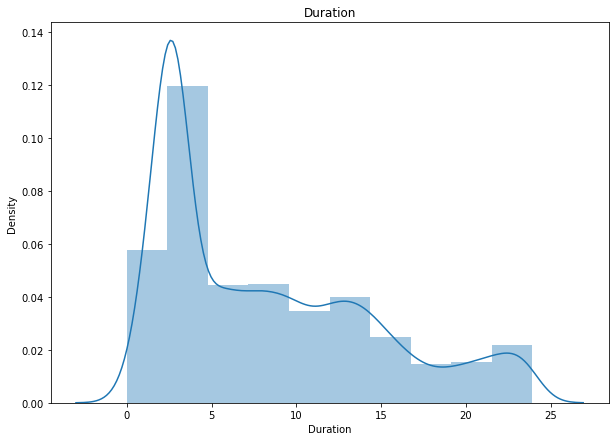

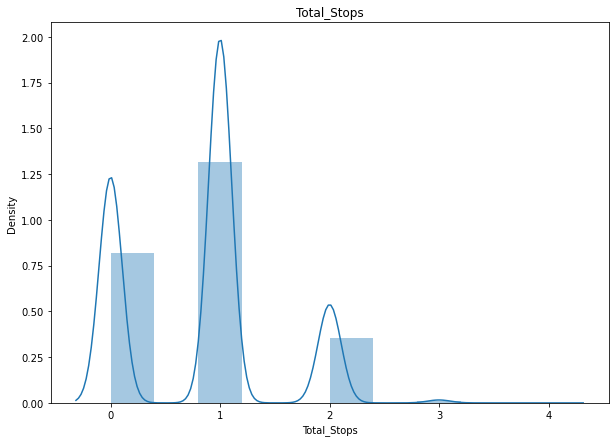

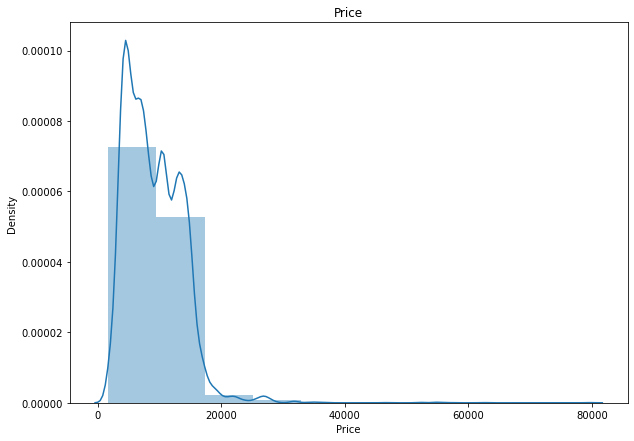

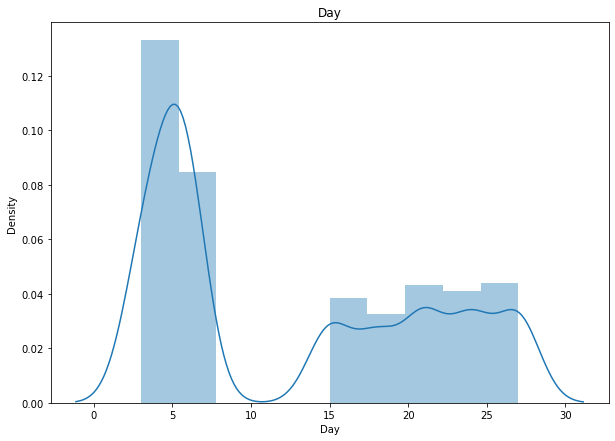

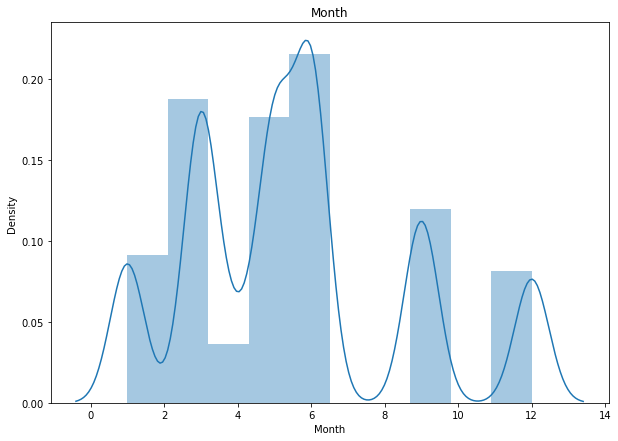

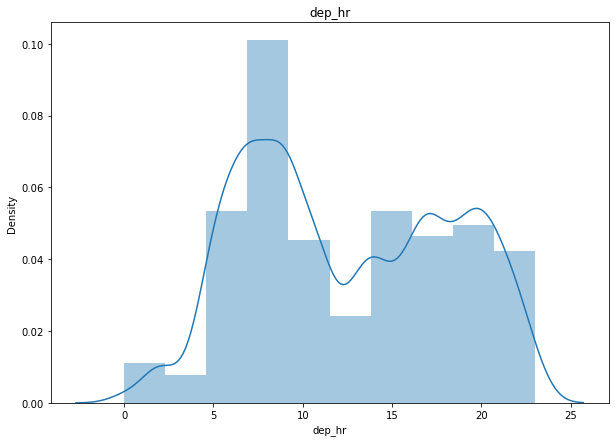

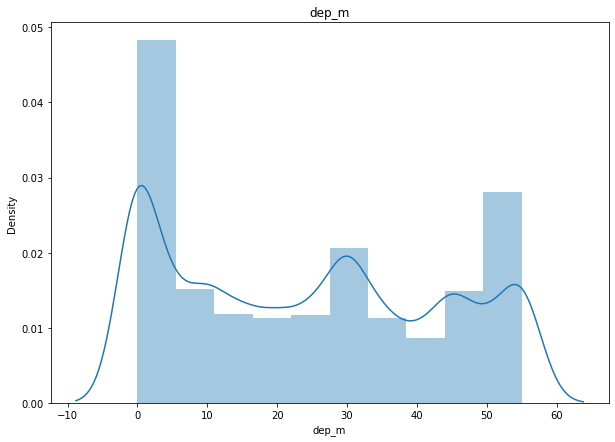

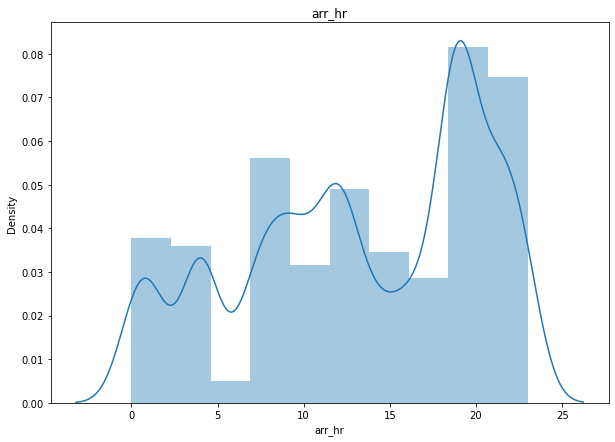

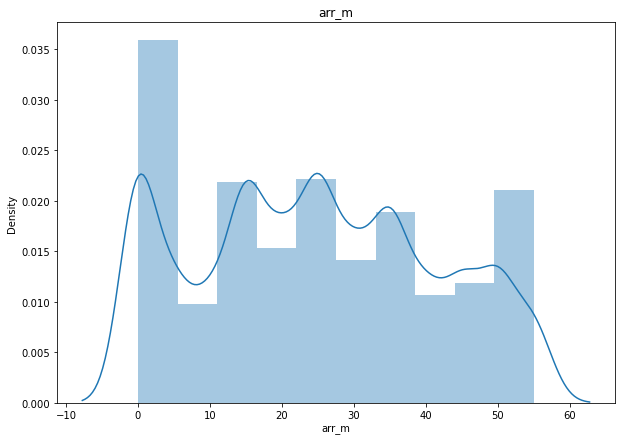

In [32]:
# lets visualize integer columns using distribution plot
for i in df[integer]:
    plt.figure(figsize=(10,7))
    sns.distplot(df[i], bins = 10)
    plt.title(i)
    plt.show()

* We Guessed it correct that there is lot of skewness present in the dataset and data is spreaded as well in almost all the columns.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Trujet')])

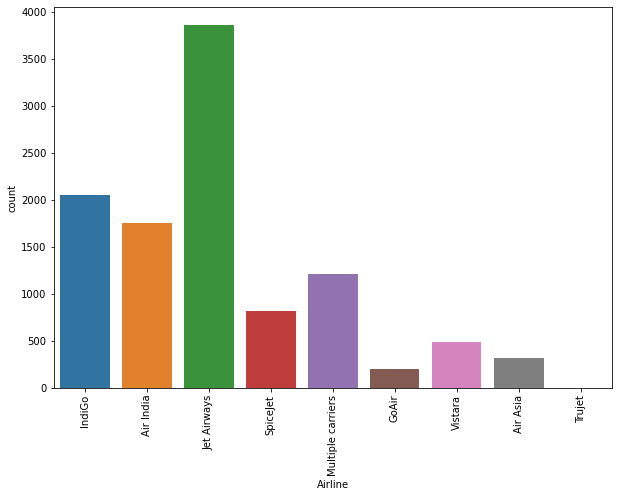

In [33]:
# lets visualize airline column using count plot
plt.figure(figsize=(10,7))
sns.countplot(df["Airline"])
plt.xticks(rotation=90)

* Here we can see that most of the people in 2019 preffered jet airways the most to travel by air then Indigo and Air India.
* people gave least preference to airlines lik, trujet, goair and air asia.

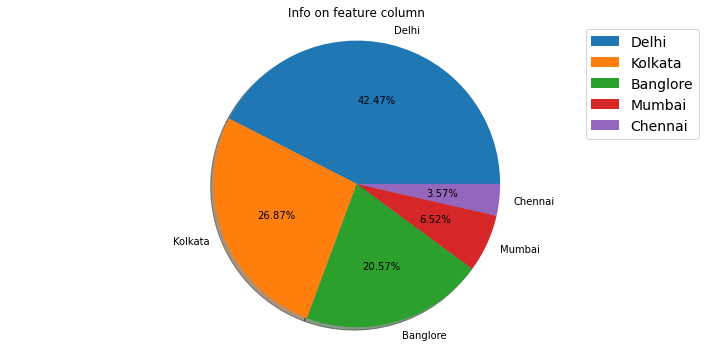

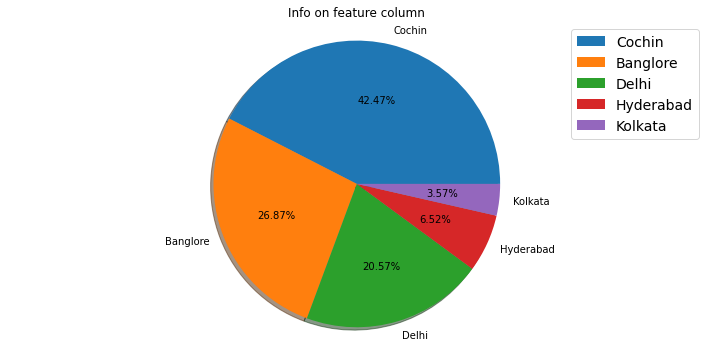

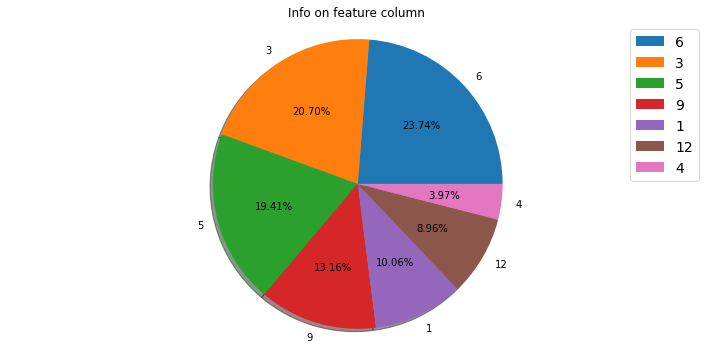

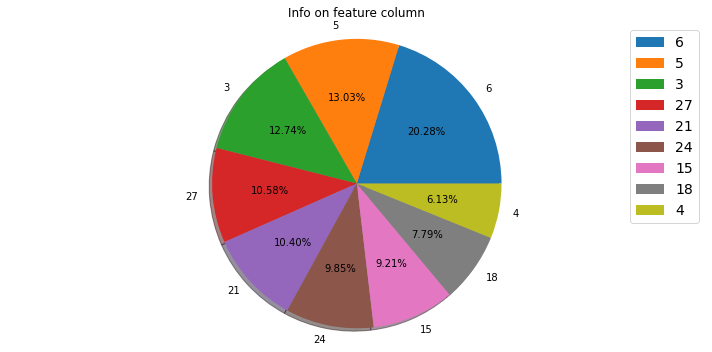

In [34]:
def generate_pie(x):
    plt.figure(figsize=(10,5))
    plt.pie(x.value_counts(), labels=x.value_counts().index, shadow=True, autopct='%1.2f%%')
    plt.legend(prop={'size':14})
    plt.axis('equal')
    plt.title('Info on feature column')
    plt.tight_layout()
    return plt.show()

generate_pie(df['Source'])
generate_pie(df['Destination'])
generate_pie(df['Month'])
generate_pie(df['Day'])

* Here in the first pie we can see the source from where the flight were starting,
in the second pic we can see the destination which were most in demand.
in third pic most prefered month of travel
in last pic we can see most preffered days during 2019

# BiVariate Analysis:-

<AxesSubplot:xlabel='Source', ylabel='Price'>

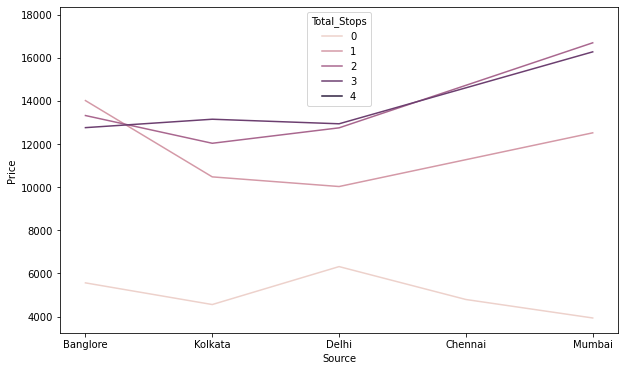

In [35]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Source', y='Price', hue='Total_Stops', data=df, ci=None)

* here we can see the prices starting from source airports with cheapest being the non stop flight

<AxesSubplot:xlabel='Destination', ylabel='Price'>

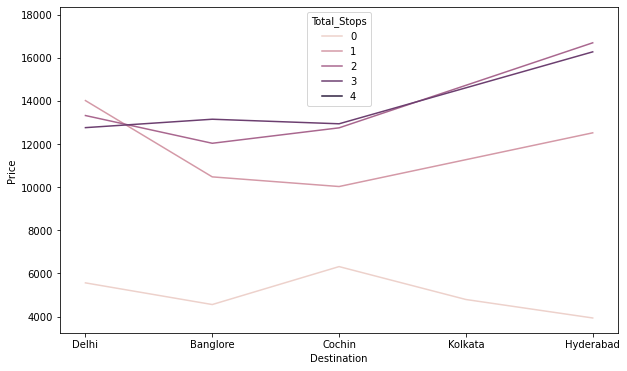

In [36]:
# visualizing destination 
plt.figure(figsize=(10,6))
sns.lineplot(x='Destination', y='Price', hue='Total_Stops', data=df, ci=None)

* here we can see prices for the destination airports again the cheapest been the non stop flights

<AxesSubplot:xlabel='Month', ylabel='Price'>

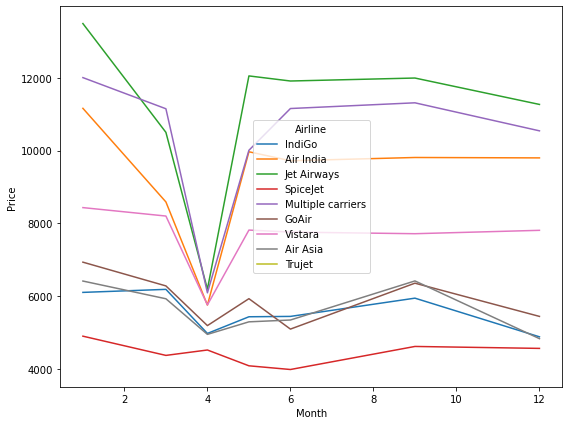

In [37]:
# visualizing month of journey with price and hue airline =
plt.figure(figsize=(9,7))
sns.lineplot(x="Month",y="Price",hue="Airline",data=df, ci=None)

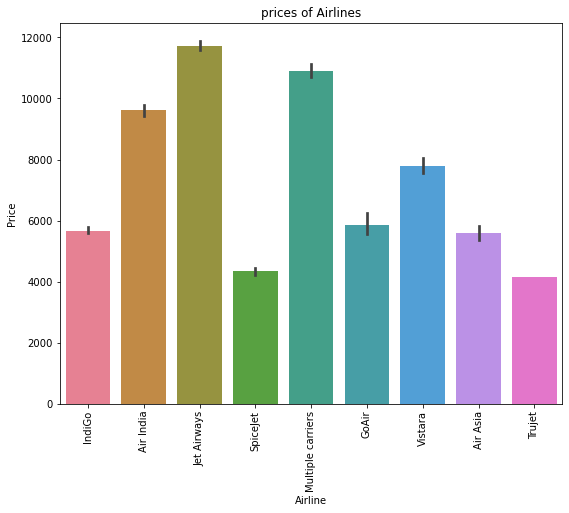

In [38]:
# Compairing price of Airlines
plt.figure(figsize=(9,7))
plt.title("prices of Airlines")
sns.barplot(df["Airline"], df["Price"], data =df, palette="husl")
plt.xticks(rotation=90)
plt.show()

* Here we can see that cheapest airlines was trujet and spice airlines while the most demanded jet airways was the costliest one.

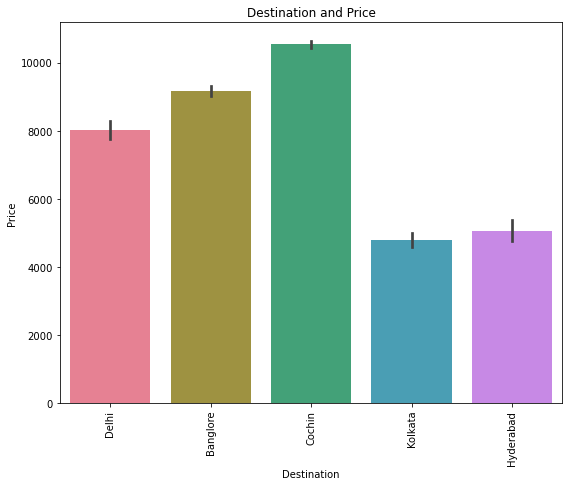

In [39]:
plt.figure(figsize=[9,7])
plt.title('Destination and Price')
sns.barplot(df['Destination'],df['Price'],data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

* Here we can clearly see that if the destination of travel in kolkata or hyderabad then they are cheap but if travel destination is cochin, banglore, or delhi then they are quite costly.

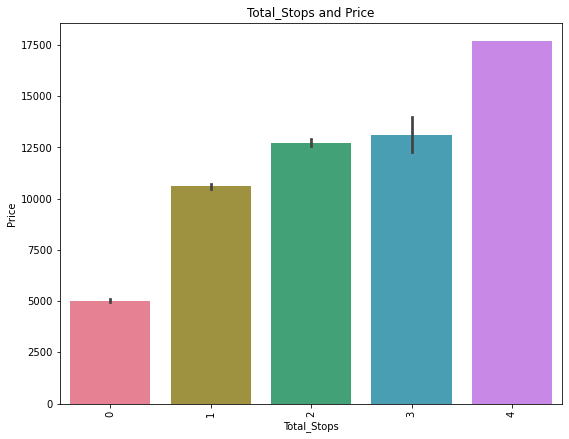

In [40]:
#Comparision betweentotal stops and prices
plt.figure(figsize=[9,7])
plt.title('Total_Stops and Price')
sns.barplot(df['Total_Stops'],df['Price'],data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

* Here we can see that non stop flights were cheapest as compared to flights with stops or connecting flights and flights with 4 stops cost the most.

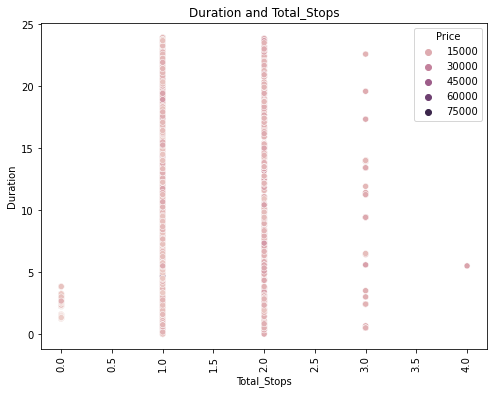

In [41]:
# lets compare duration with total stops 
plt.figure(figsize=[8,6])
plt.title("Duration and Total_Stops")
sns.scatterplot(x=df["Total_Stops"],y=df["Duration"],hue=df["Price"])
plt.xticks(rotation=90)
plt.show()

* Here we can clearly see that non-stop flights were cheap during this period of 2019 and were obviously taking least time to reach from source to destination.
* Frequency of connicting flight with 1 stop or 2 stop was most and with a wide variety of prices too.
* flights with more than 2 stops were less and quite costly.

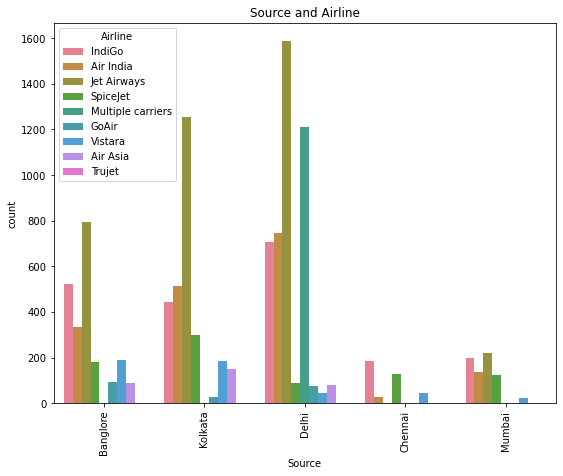

In [42]:
,# Comparision between source and airline.
plt.figure(figsize=(9,7))
plt.title("Source and Airline")
sns.countplot(x="Source",hue="Airline",data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

* Here we can see during this period Airline which flew Maximum flights was Jet Airways while Air India and Indigo stands second and third.
* Maximum flight Started from source Airport Delhi

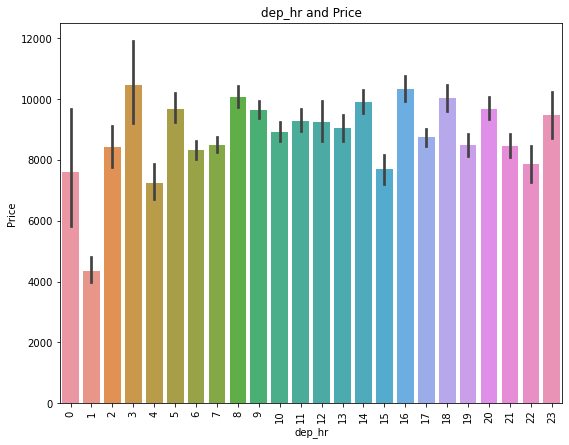

In [43]:
# Compairing dep_hour with price
plt.figure(figsize=(9,7))
plt.title("dep_hr and Price")
sns.barplot(x=df["dep_hr"],y=df["Price"], data=df)
plt.xticks(rotation=90)
plt.show()

* Observing this barplot we can see that in the year 2019 we were getting cheaper fares in the late night or early morning flights.Flight fares were at the highest during the late morning hours till afternoon.

# Multivariate Analysis:

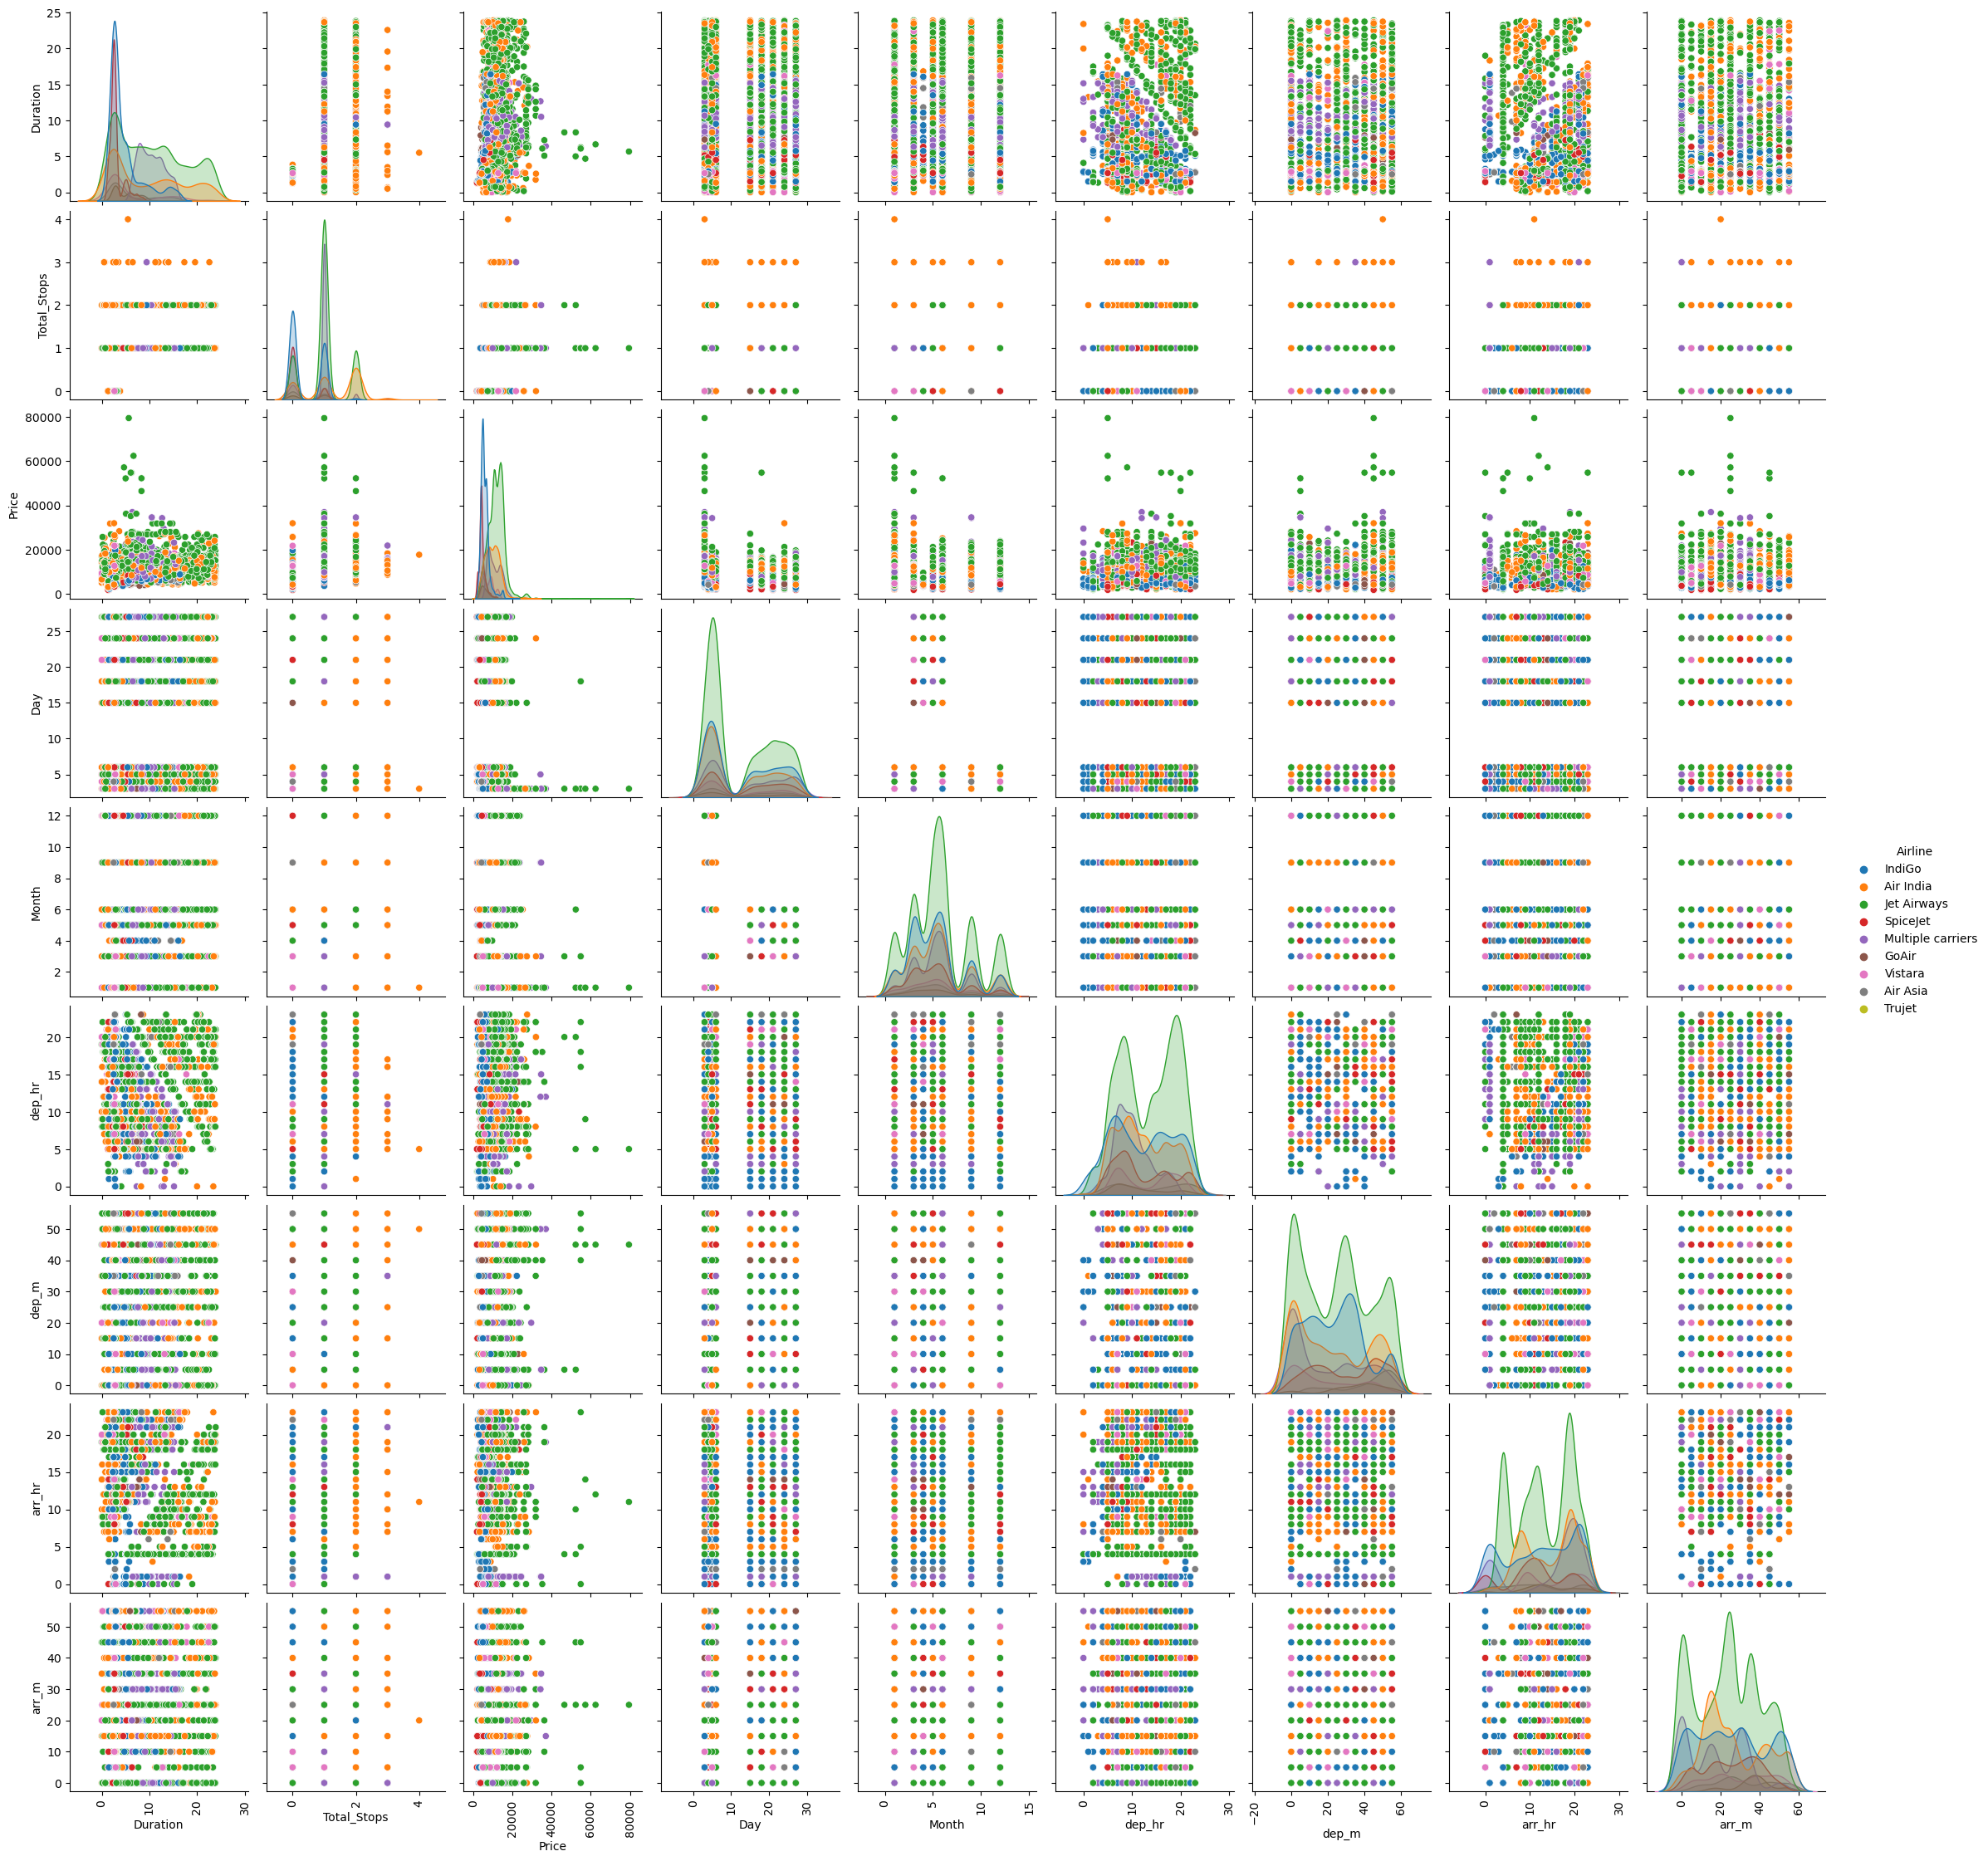

In [44]:
# lets visualize all the columns in the data set using the pairplot
plt.style.use('default')
a=sns.pairplot(df, hue="Airline",diag_kind='kde')
for ax in a.axes.flat:
    ax.tick_params("x", labelrotation=90)
plt.show()

* In the above pairplot we can see different pair of features. we can also notice presence of Outliers which we need to handle.

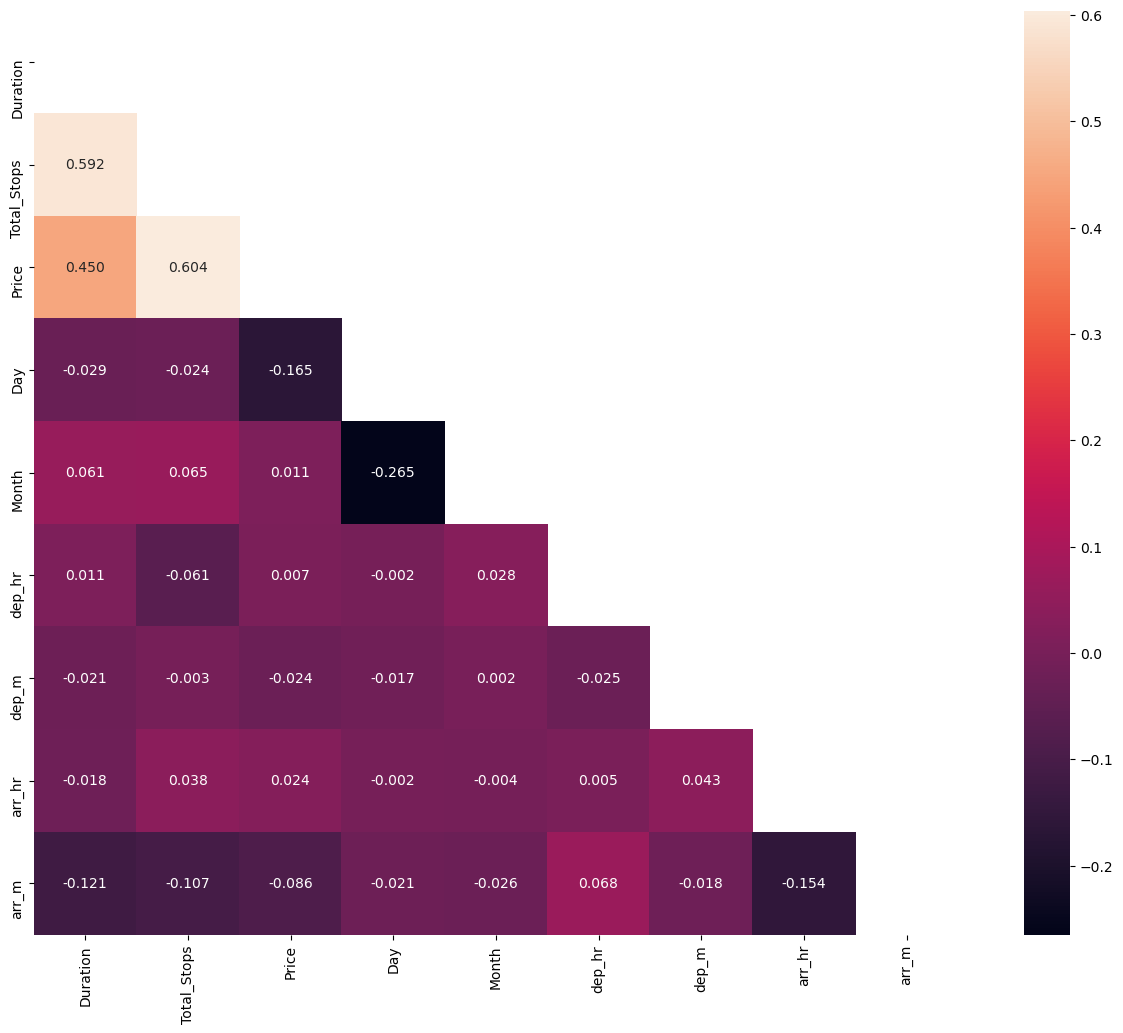

In [45]:
# lets see correlation between all the columns using the heatmap
tri=np.triu(df.corr())
plt.figure(figsize=(17,12))
sns.heatmap(df.corr(), annot=True, square= True, fmt='0.3f', mask=tri)
plt.xticks(rotation=90)
plt.show()

* Here we can see very strong correlation between column Duration with Total_stops and duration with Price, also we can observe very good correlation between the columns Total_stops and price.

# Outliers:

<AxesSubplot:>

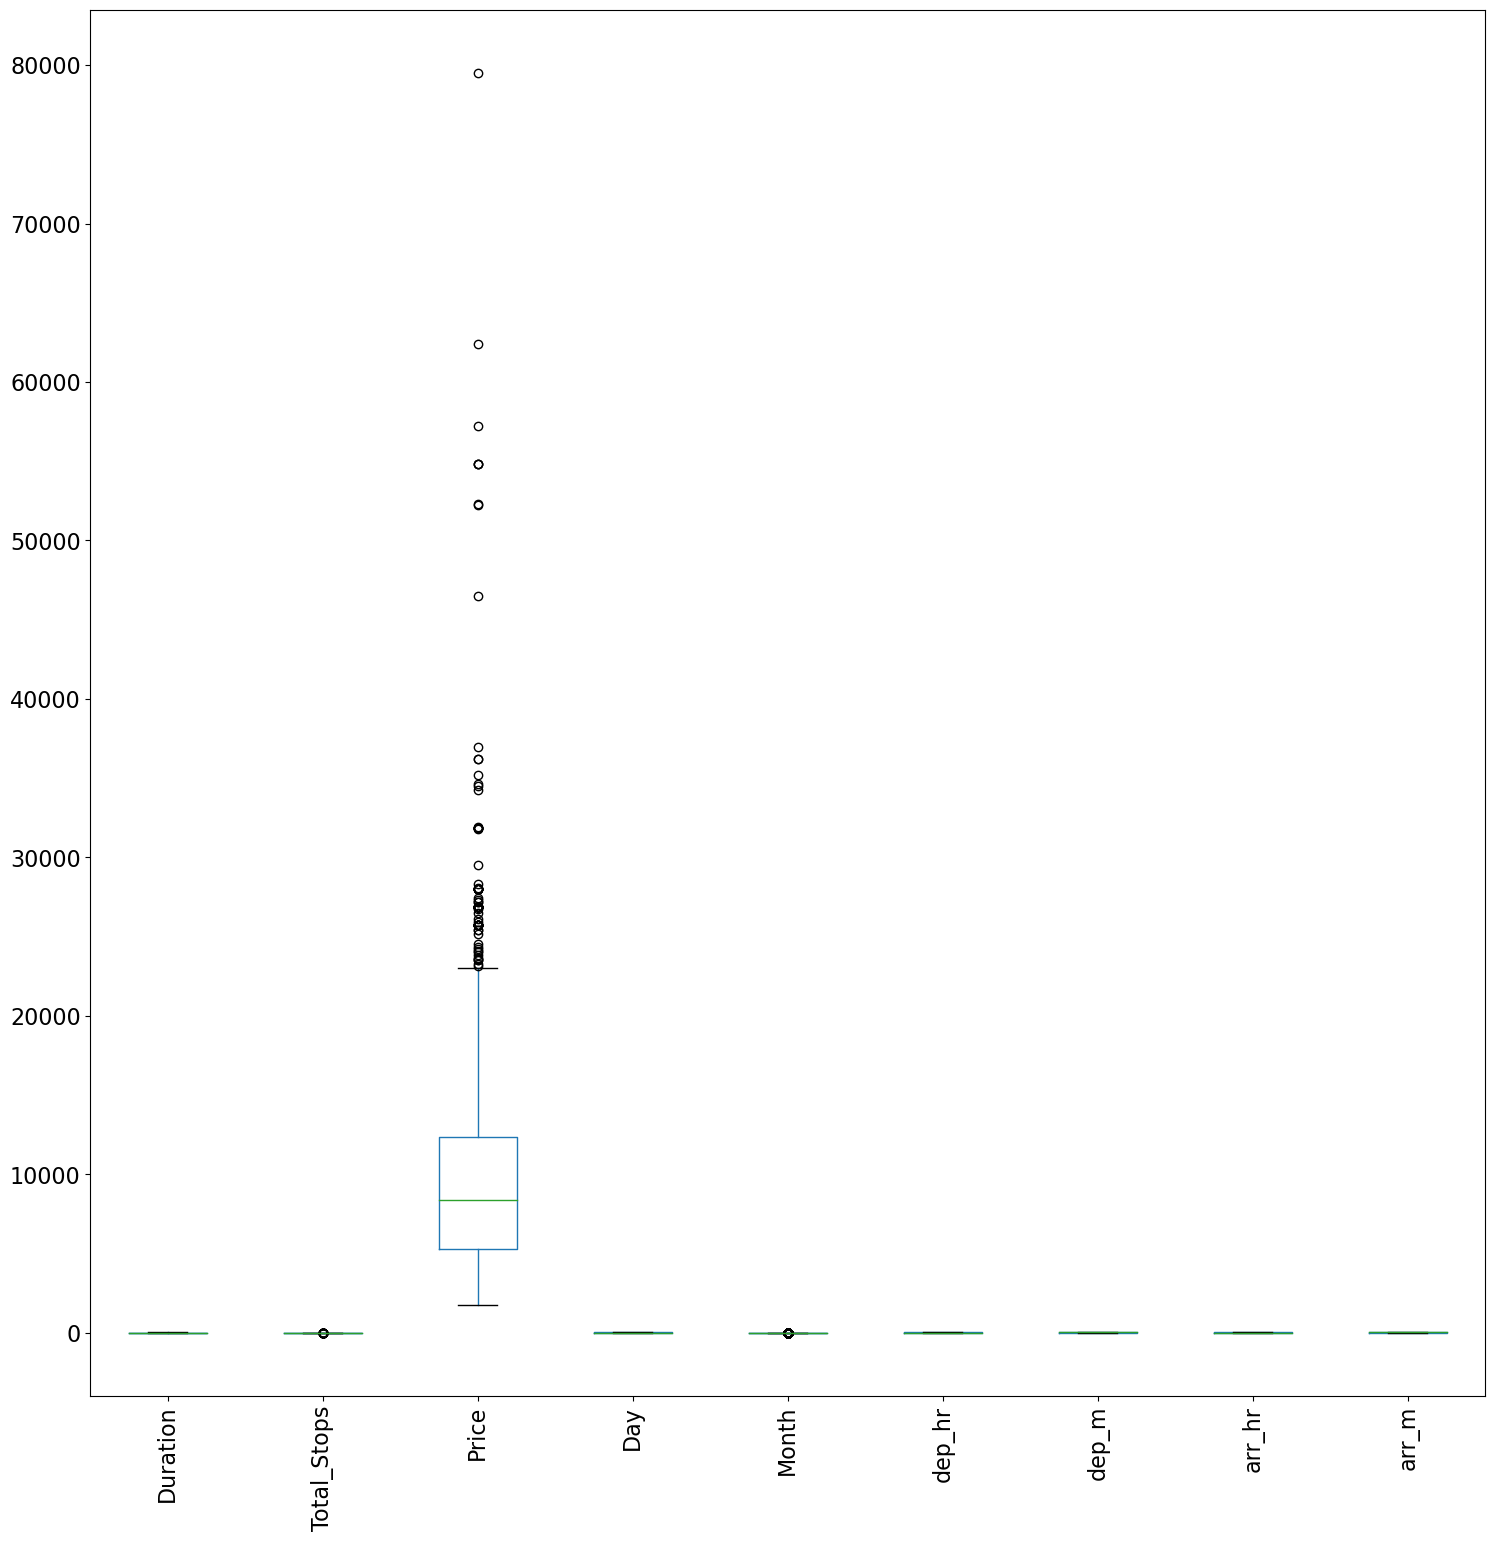

In [46]:
# Lets check and visualize presence of outliers using boxplot
df.plot(rot=90, kind='box',fontsize=16, figsize=(18,18))

* Here in this box plot we can see presence of outliers in 3 columns i.e. Total_stops, Price, Month etc. we need to to treat them. but since price is the target column we can't remove outliers from target column.

# ZScore Method:

In [47]:
# Lets Remove outliers using Zscore method
feature=df[['Total_Stops','Month']]

In [48]:
from scipy.stats import zscore
z=np.abs(zscore(feature))
df1=df[(z<3).all(axis=1)]
df1

Airline    Source Destination                  Route   Duration  \
0           IndiGo  Banglore       Delhi              BLR → DEL   2.833333   
1        Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7.416667   
2      Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK  19.000000   
3           IndiGo   Kolkata    Banglore        CCU → NAG → BLR   5.416667   
4           IndiGo  Banglore       Delhi        BLR → NAG → DEL   4.750000   
...            ...       ...         ...                    ...        ...   
10678     Air Asia   Kolkata    Banglore              CCU → BLR   2.500000   
10679    Air India   Kolkata    Banglore              CCU → BLR   2.583333   
10680  Jet Airways  Banglore       Delhi              BLR → DEL   3.000000   
10681      Vistara  Banglore       Delhi              BLR → DEL   2.666667   
10682    Air India     Delhi      Cochin  DEL → GOI → BOM → COK   8.333333   

       Total_Stops Additional_Info  Price  Day  Month  dep_hr  dep_m  arr_hr  \
0                0         No info   3897   24      3      22     20       1   
1                2         No info   7662    5      1       5     50      13   
2                2         No info  13882    6      9       9     25       4   
3                1         No info   6218    5     12      18      5      23   
4                1         No info  13302    3      1      16     50      21   
...            ...             ...    ...  ...    ...     ...    ...     ...   
10678            0         No info   4107    4      9      19     55      22   
10679            0         No info   4145   27      4      20     45      23   
10680            0         No info   7229   27      4       8     20      11   
10681            0         No info  12648    3      1      11     30      14   
10682            2         No info  11753    5      9      10     55      19   

       arr_m  
0         10  
1         15  
2         25  
3         30  
4         35  
...      ...  
10678     25  
10679     20  
10680     20  
10681     10  
10682     15  

[10637 rows x 14 columns]

* we have successfully removed the skewness using zscore method.

In [49]:
# Lets check the shape of new dataset
df1.shape

(10637, 14)

In [50]:
# Lets check the dataloss using zscore method
loss=(((df.shape[0]-df1.shape[0])/df.shape[0])*100)

In [51]:
loss

0.4305906580548535

we have lost just 0.43% of data which is excellent.

# Skewness:

In [52]:
# Lets check the skewness in the dataset
df1.skew()

Duration       0.833445
Total_Stops    0.221254
Price          1.825546
Day            0.365883
Month          0.630321
dep_hr         0.108616
dep_m          0.166761
arr_hr        -0.368518
arr_m          0.108566
dtype: float64

* Here we can see presence of skewness in 3 columns i.e. Duration, price and Month, but since Price is our target column we will not remove skewness from dataset.

In [53]:
# Lets remove skewness using yeo-johnson method:
feat=["Duration","Month"]

In [54]:
# Importing all required library
from sklearn.preprocessing import PowerTransformer
scaler= PowerTransformer(method='yeo-johnson')
'''
parameters:
method= 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod= 'box_cox' or 'yeo-johnson'\n"

In [55]:
df1[feat] = scaler.fit_transform(df1[feat].values)

In [56]:
# Lets check skewness again
df1[feat].skew()

Duration   -0.001904
Month      -0.026246
dtype: float64

* Here we have successfully removed skewness from both the columns using yeo-johnson

# Encoding:

In [57]:
# lets seperate categorical column in df1
category=[]
for i in df1.dtypes.index:
    if df1.dtypes[i]=="object":
        category.append(i)
print(category)

['Airline', 'Source', 'Destination', 'Route', 'Additional_Info']


* Here is the list of categorical columns present in the new dataset.

In [58]:
# lets convert dtype using LabelEncoder
# importing required library for label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1[category]=df1[category].apply(le.fit_transform)
df1[category].head()

Airline  Source  Destination  Route  Additional_Info
0        3       0            2     15                6
1        1       3            0     73                6
2        4       2            1    106                6
3        3       3            0     80                6
4        3       0            2     23                6

* We have successfully encoded the categorical columns in new dataset using LabelEncoder.

In [59]:
# Checking correlation using heatmap
df1.corr()

Airline    Source  Destination     Route  Duration  \
Airline          1.000000 -0.013344     0.054797  0.020840 -0.027205   
Source          -0.013344  1.000000    -0.434026  0.385755  0.070313   
Destination      0.054797 -0.434026     1.000000 -0.219951 -0.387327   
Route            0.020840  0.385755    -0.219951  1.000000  0.326211   
Duration        -0.027205  0.070313    -0.387327  0.326211  1.000000   
Total_Stops     -0.162846  0.197697    -0.425868  0.464898  0.628269   
Additional_Info -0.145461 -0.039291     0.082225  0.018526 -0.133259   
Price            0.024462  0.015827    -0.262886  0.169697  0.480941   
Day              0.026424  0.006688     0.007325  0.095215 -0.026169   
Month            0.003028  0.064019    -0.067071  0.062827  0.058020   
dep_hr          -0.025270  0.059065    -0.088638 -0.076177 -0.021973   
dep_m           -0.070172 -0.057254     0.096364 -0.066244 -0.037455   
arr_hr          -0.009076  0.025409    -0.057557  0.012008  0.004936   
arr_m           -0.084531  0.021595     0.006840 -0.176677 -0.148403   

                 Total_Stops  Additional_Info     Price       Day     Month  \
Airline            -0.162846        -0.145461  0.024462  0.026424  0.003028   
Source              0.197697        -0.039291  0.015827  0.006688  0.064019   
Destination        -0.425868         0.082225 -0.262886  0.007325 -0.067071   
Route               0.464898         0.018526  0.169697  0.095215  0.062827   
Duration            0.628269        -0.133259  0.480941 -0.026169  0.058020   
Total_Stops         1.000000        -0.089934  0.606843 -0.021511  0.064941   
Additional_Info    -0.089934         1.000000 -0.042194 -0.029933 -0.022199   
Price               0.606843        -0.042194  1.000000 -0.164382 -0.003923   
Day                -0.021511        -0.029933 -0.164382  1.000000 -0.173877   
Month               0.064941        -0.022199 -0.003923 -0.173877  1.000000   
dep_hr             -0.052428        -0.051468  0.009107 -0.001900  0.024306   
dep_m              -0.002390        -0.012707 -0.025681 -0.015777 -0.004201   
arr_hr              0.033733         0.026282  0.023005 -0.001954 -0.006181   
arr_m              -0.105550         0.045568 -0.084708 -0.021843 -0.029874   

                   dep_hr     dep_m    arr_hr     arr_m  
Airline         -0.025270 -0.070172 -0.009076 -0.084531  
Source           0.059065 -0.057254  0.025409  0.021595  
Destination     -0.088638  0.096364 -0.057557  0.006840  
Route           -0.076177 -0.066244  0.012008 -0.176677  
Duration        -0.021973 -0.037455  0.004936 -0.148403  
Total_Stops     -0.052428 -0.002390  0.033733 -0.105550  
Additional_Info -0.051468 -0.012707  0.026282  0.045568  
Price            0.009107 -0.025681  0.023005 -0.084708  
Day             -0.001900 -0.015777 -0.001954 -0.021843  
Month            0.024306 -0.004201 -0.006181 -0.029874  
dep_hr           1.000000 -0.025210  0.006261  0.067450  
dep_m           -0.025210  1.000000  0.043148 -0.016716  
arr_hr           0.006261  0.043148  1.000000 -0.152442  
arr_m            0.067450 -0.016716 -0.152442  1.000000

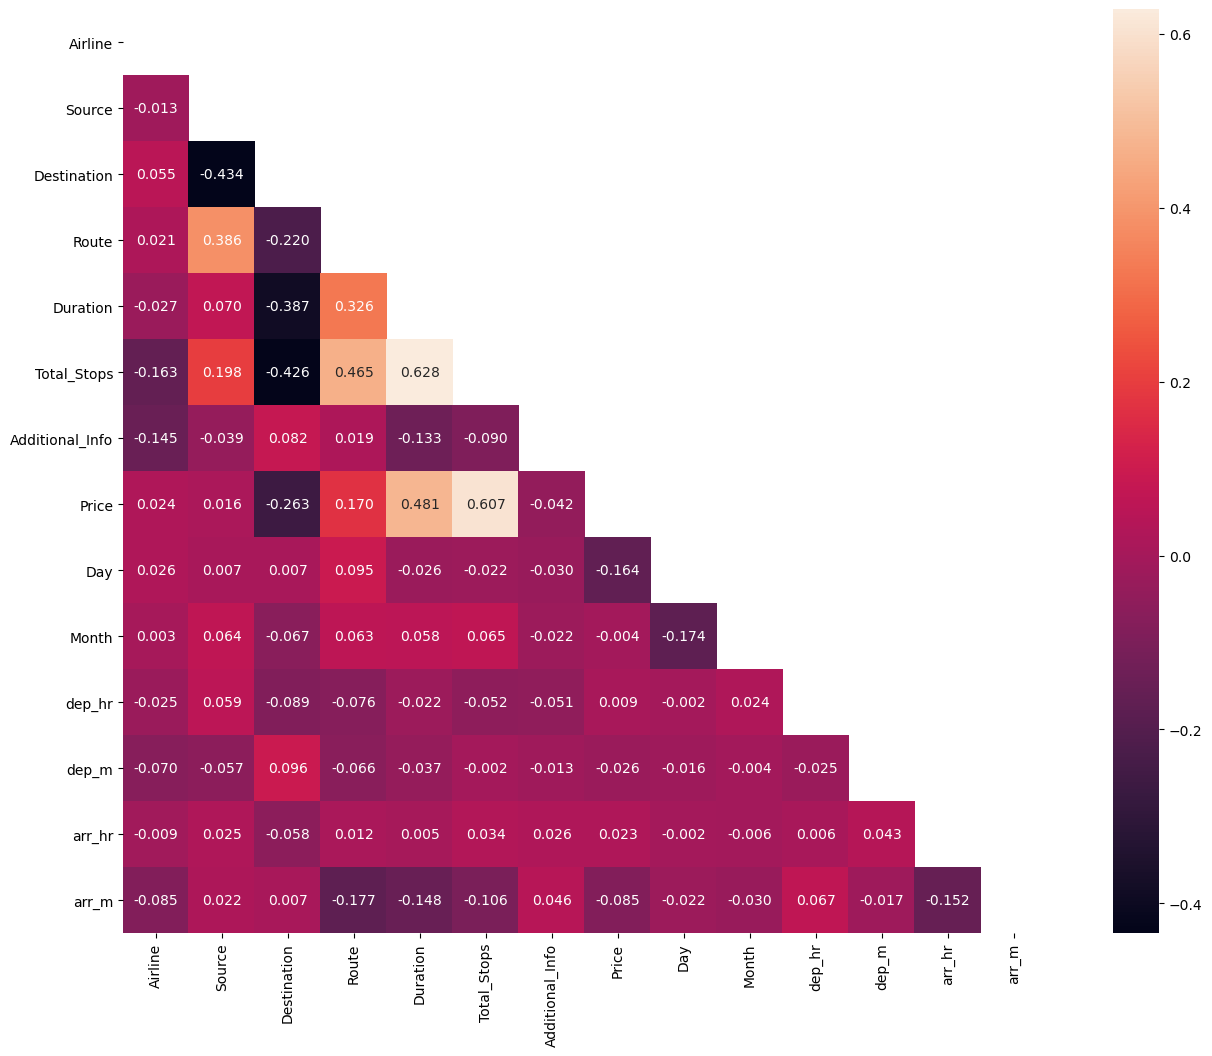

In [60]:
# Lets visualize the correlation by plotting heat map
tri=np.triu(df1.corr())
plt.figure(figsize=(17,12))
sns.heatmap(df1.corr(), annot=True, square= True, fmt='0.3f', mask=tri)
plt.xticks(rotation=90)
plt.show()

* There is no multicolinearity present in the dataset.
* Here we can see very strong correlation between column Duration with Total_stops and duration with Price, also we can observe very good correlation between the columns Total_stops and price.
we can observe strong relation between Route and Total_Stops and Route and Duration.
Destination is negatively correlated to Total_Stops, Duration and Source.
Source share good relation with Route too.

# Test Dataset:

In [61]:
# lets check top 10 rows of the test dataset
df_test.head(10)

Airline Date_of_Journey    Source Destination            Route  \
0        Jet Airways       6/06/2019     Delhi      Cochin  DEL → BOM → COK   
1             IndiGo      12/05/2019   Kolkata    Banglore  CCU → MAA → BLR   
2        Jet Airways      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
3  Multiple carriers      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
4           Air Asia      24/06/2019  Banglore       Delhi        BLR → DEL   
5        Jet Airways      12/06/2019     Delhi      Cochin  DEL → BOM → COK   
6          Air India      12/03/2019  Banglore   New Delhi  BLR → TRV → DEL   
7             IndiGo       1/05/2019   Kolkata    Banglore  CCU → HYD → BLR   
8             IndiGo      15/03/2019   Kolkata    Banglore        CCU → BLR   
9        Jet Airways      18/05/2019   Kolkata    Banglore  CCU → BOM → BLR   

  Dep_Time  Arrival_Time Duration Total_Stops              Additional_Info  
0    17:30  04:25 07 Jun  10h 55m      1 stop                      No info  
1    06:20         10:20       4h      1 stop                      No info  
2    19:15  19:00 22 May  23h 45m      1 stop  In-flight meal not included  
3    08:00         21:00      13h      1 stop                      No info  
4    23:55  02:45 25 Jun   2h 50m    non-stop                      No info  
5    18:15  12:35 13 Jun  18h 20m      1 stop  In-flight meal not included  
6    07:30         22:35   15h 5m      1 stop                      No info  
7    15:15         20:30   5h 15m      1 stop                      No info  
8    10:10         12:55   2h 45m    non-stop                      No info  
9    16:30         22:35    6h 5m      1 stop                      No info

In [62]:
# lets check the shape of the test dataset
df_test.shape

(2671, 10)

* Here we can see that there are 2671 rows present in 10 columns

In [63]:
# Lets check the names of the columns present in the test dataset
df_test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

* These are all the columns present in the test dataset.

In [64]:
# lets check the information regarding the dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


* Here we can see that there are no null values present in the dataset.

In [65]:
# Lets check the datatype of all the columns present in the test dataset
df_test.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

* All the columns present in this test dataset are object type.
* we can see that there is a column Date_of_journey which we need to split.

In [66]:
# Lets check the unique values present in the test dataset
df_test.nunique()

Airline             11
Date_of_Journey     44
Source               5
Destination          6
Route              100
Dep_Time           199
Arrival_Time       704
Duration           320
Total_Stops          5
Additional_Info      6
dtype: int64

In [67]:
# Lets check the value count of each column present in the test dataset
for i in df_test.columns:
    print(df_test[i].value_counts())
    print("-------------------------------------------------")

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64
-------------------------------------------------
9/05/2019     144
12/06/2019    135
18/05/2019    129
6/06/2019     127
9/06/2019     119
21/05/2019    118
15/05/2019    106
15/06/2019    105
6/03/2019      97
21/03/2019     93
3/06/2019      92
1/06/2019      88
24/06/2019     85
1/04/2019      78
24/03/2019     78
27/06/2019     75
6/05/2019      73
24/05/2019     71
12/05/2019     68
27/03/2019     65
27/05/2019     65
3/03/2019      62
1/05/2019      62
9/03/2019      55
12/03/2019     43
18/03/2019     41
01/

In [68]:
# Converting the datatype to datetime
df_test["Date_of_Journey"]=pd.to_datetime(df_test["Date_of_Journey"])
df_test["Dep_Time"]=pd.to_datetime(df_test["Dep_Time"])
df_test["Arrival_Time"]=pd.to_datetime(df_test["Arrival_Time"])

In [69]:
# now lets check the datatype again
df_test.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
dtype: object

* Here we have successfully changed the datatype of the three columns from object to datetime.

In [70]:
# Lets split year, month and day from Date_of_Journey
#day
df_test["Day"]=pd.to_datetime(df_test.Date_of_Journey, format="%d/%m/%Y").dt.day
#Month
df_test["Month"]=pd.to_datetime(df_test.Date_of_Journey, format="%d/%m/%Y").dt.month
#Year
df_test["Year"]=pd.to_datetime(df_test.Date_of_Journey, format="%d/%m/%Y").dt.year

In [71]:
# Lets drop date_of_journey column to avoid duplication of data
df_test=df_test.drop(["Date_of_Journey"],axis=1)

In [72]:
# changing Duration column
time=(df_test["Arrival_Time"]-df_test["Dep_Time"])
time_taken=[]
for i in range(len(time)):
    duration=time.iloc[i].seconds/3600
    time_taken.append(duration)
df_test["Duration"]=time_taken

In [73]:
# separating hours and minutes from Dep_time

# Hours
df_test["Dep_Hour"]=pd.to_datetime(df_test["Dep_Time"]).dt.hour

#Minutes
df_test["Dep_Min"]=pd.to_datetime(df_test["Dep_Time"]).dt.minute

In [74]:
# Lets drop dep_time column to avoid duplication of data
df_test=df_test.drop(["Dep_Time"],axis=1)

In [75]:
# lets separate hours and minutes from Arrival_Time

# Arrival Hours
df_test["Arrival_Hour"]=pd.to_datetime(df_test["Arrival_Time"]).dt.hour

#Arrival Minutes
df_test["Arrival_Min"]=pd.to_datetime(df_test["Arrival_Time"]).dt.minute

In [76]:
# Lets Drop Arrival_Time column to avoid duplication of data
df_test=df_test.drop(["Arrival_Time"],axis=1)

In [77]:
# Lets check updated test dataset first 5 columns
df_test.head()

Airline    Source Destination            Route   Duration  \
0        Jet Airways     Delhi      Cochin  DEL → BOM → COK  10.916667   
1             IndiGo   Kolkata    Banglore  CCU → MAA → BLR   4.000000   
2        Jet Airways     Delhi      Cochin  DEL → BOM → COK  23.750000   
3  Multiple carriers     Delhi      Cochin  DEL → BOM → COK  13.000000   
4           Air Asia  Banglore       Delhi        BLR → DEL   2.833333   

  Total_Stops              Additional_Info  Day  Month  Year  Dep_Hour  \
0      1 stop                      No info    6      6  2019        17   
1      1 stop                      No info    5     12  2019         6   
2      1 stop  In-flight meal not included   21      5  2019        19   
3      1 stop                      No info   21      5  2019         8   
4    non-stop                      No info   24      6  2019        23   

   Dep_Min  Arrival_Hour  Arrival_Min  
0       30             4           25  
1       20            10           20  
2       15            19            0  
3        0            21            0  
4       55             2           45

In [78]:
# Lets check the Value counts for all the columns in the test dataset
for i in df_test.columns:
    print(df_test[i].value_counts())
    print("--------------------------------------------------")

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64
--------------------------------------------------
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64
--------------------------------------------------
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64
--------------------------------------------------
DEL → BOM → COK                624
BLR → DEL                      389
CCU → BOM → BLR                253
CCU → BLR  

In [79]:
# lets drop column which is not required for our analysis as it has 1 unique value
df_test=df_test.drop(["Year"],axis=1)

In [80]:
df_test

Airline    Source Destination            Route   Duration  \
0           Jet Airways     Delhi      Cochin  DEL → BOM → COK  10.916667   
1                IndiGo   Kolkata    Banglore  CCU → MAA → BLR   4.000000   
2           Jet Airways     Delhi      Cochin  DEL → BOM → COK  23.750000   
3     Multiple carriers     Delhi      Cochin  DEL → BOM → COK  13.000000   
4              Air Asia  Banglore       Delhi        BLR → DEL   2.833333   
...                 ...       ...         ...              ...        ...   
2666          Air India   Kolkata    Banglore  CCU → DEL → BLR  23.916667   
2667             IndiGo   Kolkata    Banglore        CCU → BLR   2.583333   
2668        Jet Airways     Delhi      Cochin  DEL → BOM → COK   6.583333   
2669          Air India     Delhi      Cochin  DEL → BOM → COK  15.250000   
2670  Multiple carriers     Delhi      Cochin  DEL → BOM → COK  14.333333   

     Total_Stops              Additional_Info  Day  Month  Dep_Hour  Dep_Min  \
0         1 stop                      No info    6      6        17       30   
1         1 stop                      No info    5     12         6       20   
2         1 stop  In-flight meal not included   21      5        19       15   
3         1 stop                      No info   21      5         8        0   
4       non-stop                      No info   24      6        23       55   
...          ...                          ...  ...    ...       ...      ...   
2666      1 stop                      No info    6      6        20       30   
2667    non-stop                      No info   27      3        14       20   
2668      1 stop                      No info    3      6        21       50   
2669      1 stop                      No info    3      6         4        0   
2670      1 stop                      No info   15      6         4       55   

      Arrival_Hour  Arrival_Min  
0                4           25  
1               10           20  
2               19            0  
3               21            0  
4                2           45  
...            ...          ...  
2666            20           25  
2667            16           55  
2668             4           25  
2669            19           15  
2670            19           15  

[2671 rows x 13 columns]

In [81]:
# Lets group same company's names
df_test["Airline"].replace("Jet Airways Business","Jet Airways", inplace=True)
df_test["Airline"].replace("Multiple carriers Premium economy","Multiple carriers",inplace=True)
df_test["Airline"].replace("Vistara Premium economy","Vistara",inplace=True)

In [82]:
# Lets group Destination column
df_test["Destination"].replace("New Delhi","Delhi",inplace=True)

In [83]:
# lets group Additional_Info column
df_test["Additional_Info"].replace("1 Long layover","Long layover",inplace=True)
df_test["Additional_Info"].replace("2 Long layover","Long layover",inplace=True)
df_test["Additional_Info"].replace("No Info","No info",inplace=True)

In [84]:
# Lets assign values for Total_Stops column
df_test.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

In [85]:
# Lets check Statistical Description of the test dataset
df_test.describe()

Duration  Total_Stops          Day        Month     Dep_Hour  \
count  2671.000000  2671.000000  2671.000000  2671.000000  2671.000000   
mean      8.308187     0.833396    12.026956     5.607263    12.603519   
std       6.331450     0.672315     8.564408     3.042952     5.686673   
min       0.000000     0.000000     3.000000     1.000000     0.000000   
25%       2.833333     0.000000     5.000000     3.000000     8.000000   
50%       6.500000     1.000000     6.000000     5.000000    12.000000   
75%      12.583333     1.000000    21.000000     6.000000    18.000000   
max      23.916667     4.000000    27.000000    12.000000    23.000000   

           Dep_Min  Arrival_Hour  Arrival_Min  
count  2671.000000   2671.000000  2671.000000  
mean     24.891426     13.585174    24.558218  
std      19.086522      7.040396    16.775436  
min       0.000000      0.000000     0.000000  
25%       5.000000      8.000000    10.000000  
50%      25.000000     15.000000    25.000000  
75%      45.000000     19.000000    35.000000  
max      55.000000     23.000000    55.000000

* Here also there is presence of outliers, skewness and data is spreaded just like train dataset.

# OutLiers:

<AxesSubplot:>

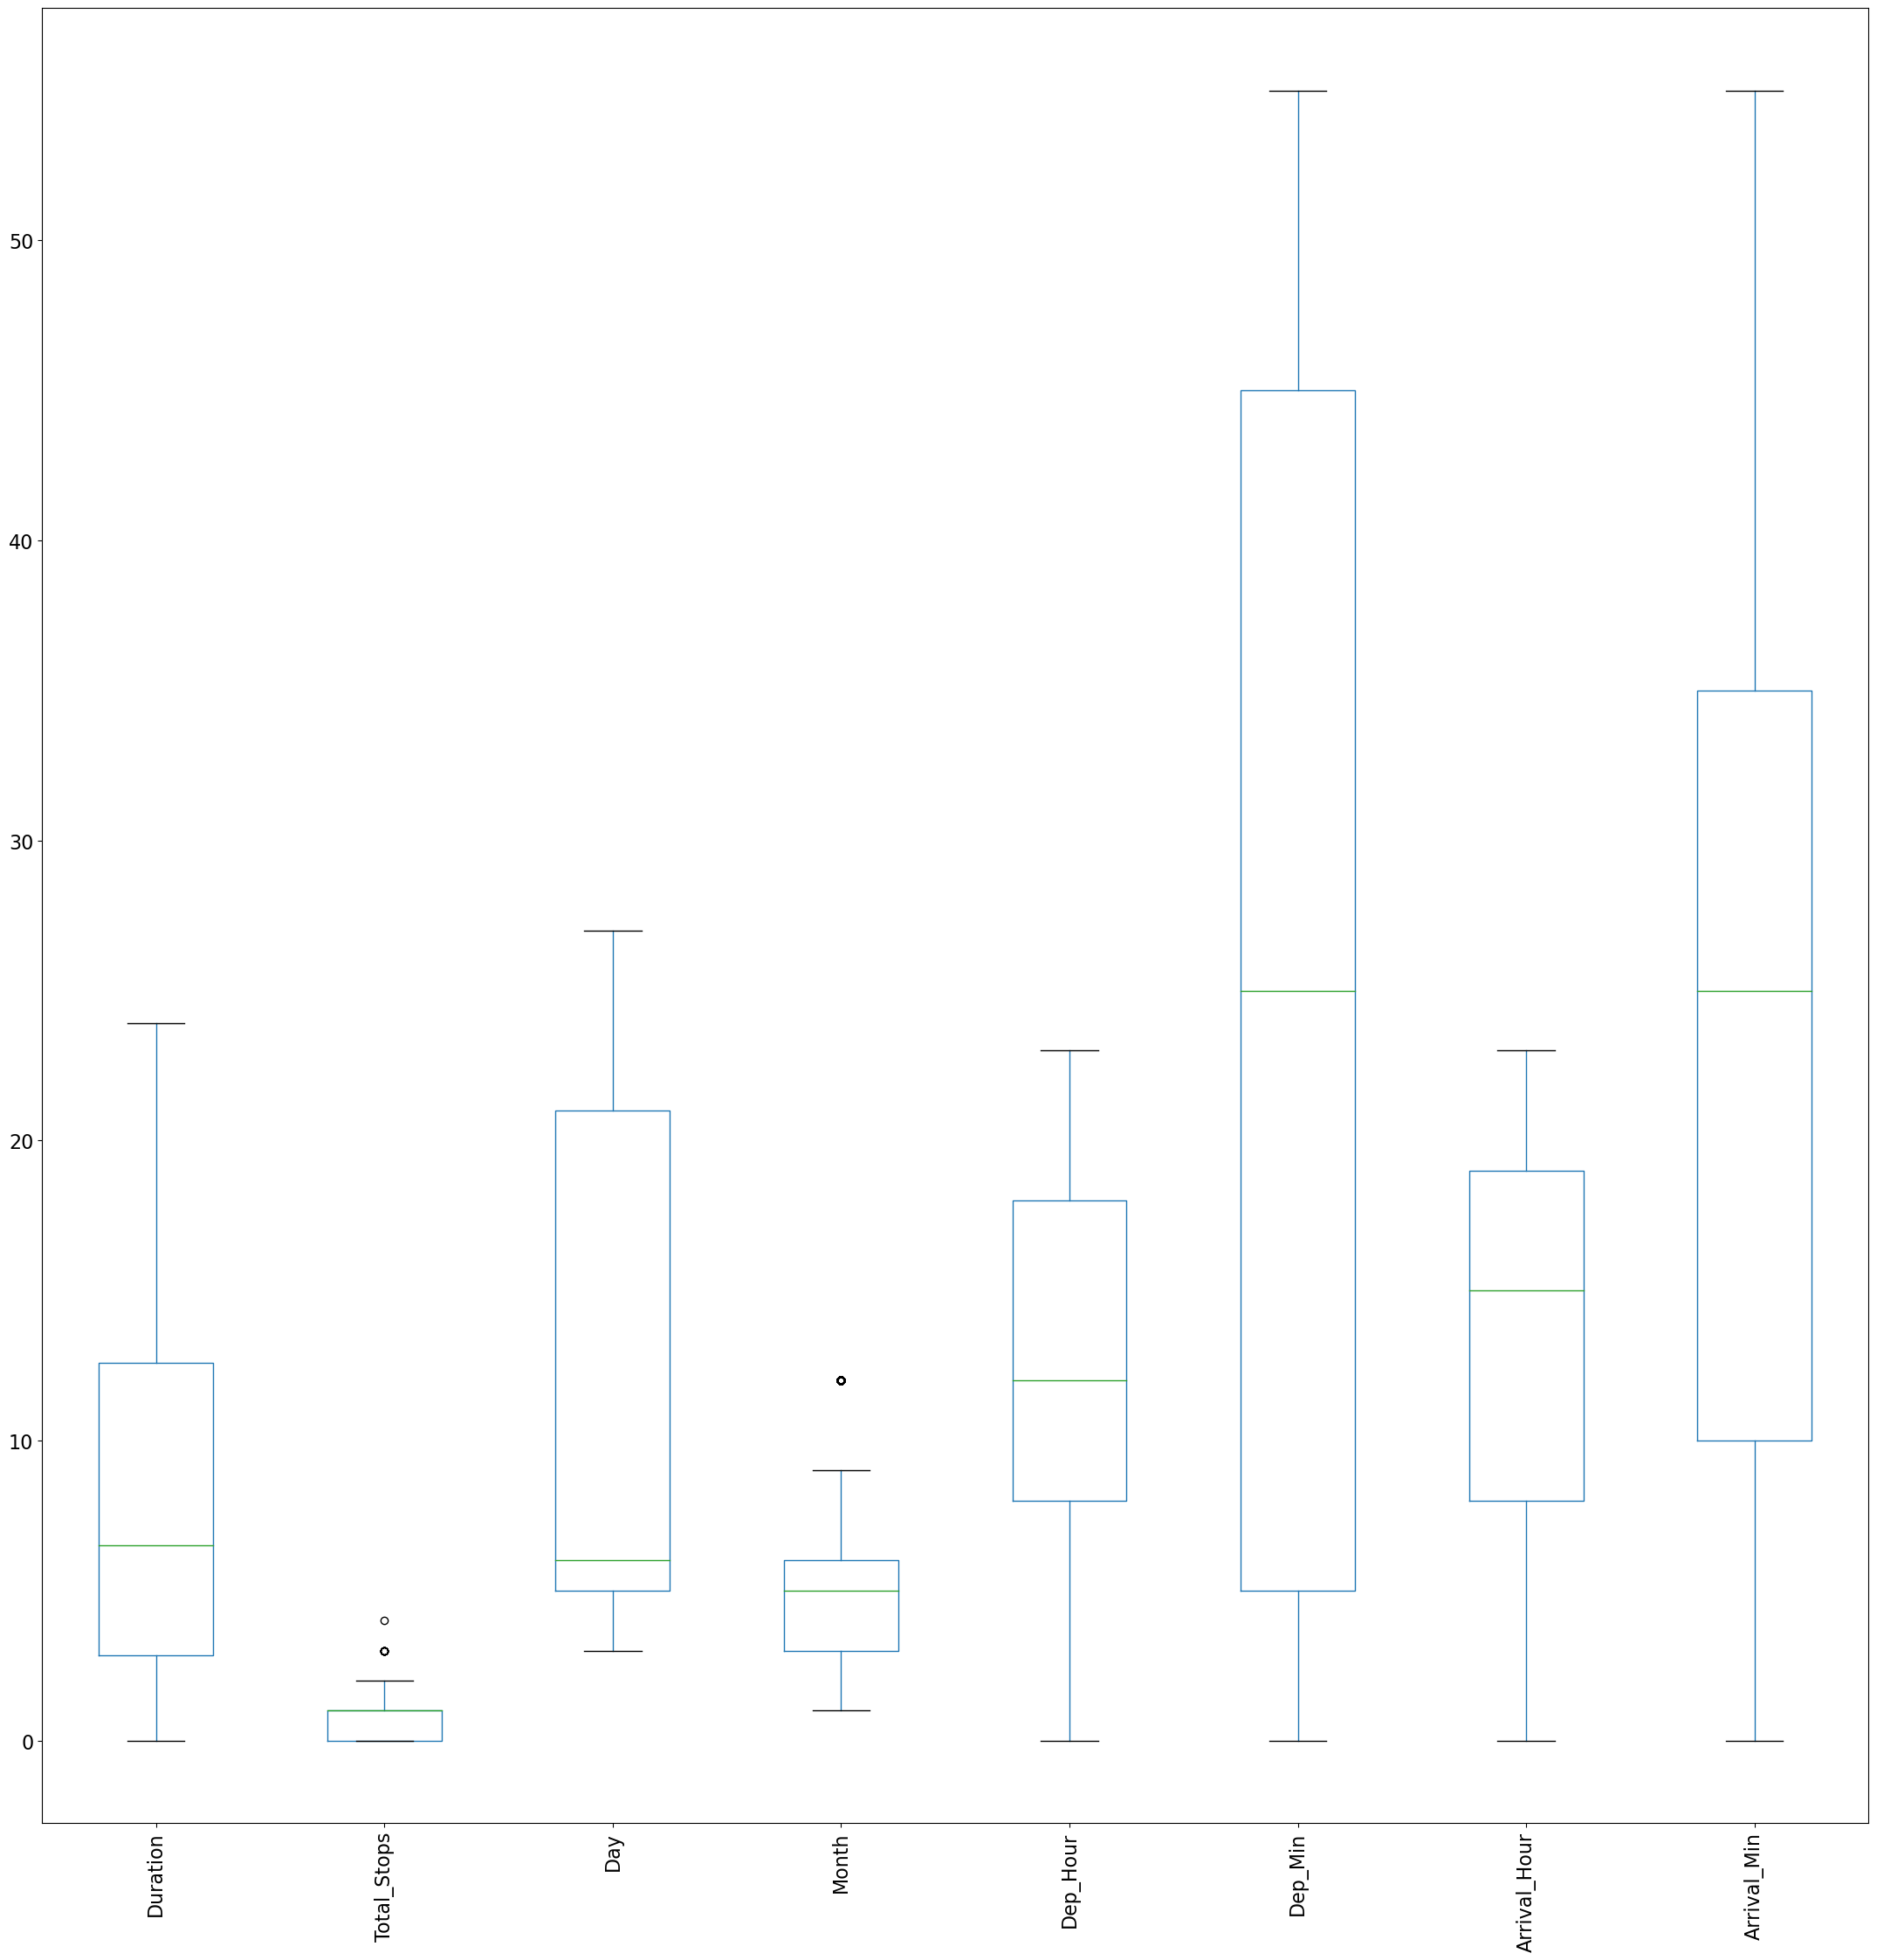

In [86]:
# Lets check presence of outliers using box plot
df_test.plot(rot=90,kind="box",fontsize=16,figsize=(27,27))

* Here also we can see presence of Outliers in the columns Month and Total_Stops same as Train data

# ZScore Method:

In [87]:
# lets remove outliers using Zscore Method
test_feat=df_test[["Total_Stops","Month"]]

# Implimenting zscore method on test_feat
z=np.abs(zscore(test_feat))
df1_test=df_test[(z<3).all(axis=1)]
df1_test

Airline    Source Destination            Route   Duration  \
0           Jet Airways     Delhi      Cochin  DEL → BOM → COK  10.916667   
1                IndiGo   Kolkata    Banglore  CCU → MAA → BLR   4.000000   
2           Jet Airways     Delhi      Cochin  DEL → BOM → COK  23.750000   
3     Multiple carriers     Delhi      Cochin  DEL → BOM → COK  13.000000   
4              Air Asia  Banglore       Delhi        BLR → DEL   2.833333   
...                 ...       ...         ...              ...        ...   
2666          Air India   Kolkata    Banglore  CCU → DEL → BLR  23.916667   
2667             IndiGo   Kolkata    Banglore        CCU → BLR   2.583333   
2668        Jet Airways     Delhi      Cochin  DEL → BOM → COK   6.583333   
2669          Air India     Delhi      Cochin  DEL → BOM → COK  15.250000   
2670  Multiple carriers     Delhi      Cochin  DEL → BOM → COK  14.333333   

      Total_Stops              Additional_Info  Day  Month  Dep_Hour  Dep_Min  \
0               1                      No info    6      6        17       30   
1               1                      No info    5     12         6       20   
2               1  In-flight meal not included   21      5        19       15   
3               1                      No info   21      5         8        0   
4               0                      No info   24      6        23       55   
...           ...                          ...  ...    ...       ...      ...   
2666            1                      No info    6      6        20       30   
2667            0                      No info   27      3        14       20   
2668            1                      No info    3      6        21       50   
2669            1                      No info    3      6         4        0   
2670            1                      No info   15      6         4       55   

      Arrival_Hour  Arrival_Min  
0                4           25  
1               10           20  
2               19            0  
3               21            0  
4                2           45  
...            ...          ...  
2666            20           25  
2667            16           55  
2668             4           25  
2669            19           15  
2670            19           15  

[2659 rows x 13 columns]

In [88]:
# lets check the shape of new test dataset
df1_test.shape

(2659, 13)

In [89]:
# lets check the shape of old test dataset
df_test.shape

(2671, 13)

In [90]:
# lets check the dataloss
loss=(((df_test.shape[0]-df1_test.shape[0])/df_test.shape[0])*100)

In [91]:
loss

0.44926993635342566

* Here we have lost just 0.45% data to remove outliers from the dataset which is quite good.

In [92]:
# lets check for skewness in new test dataset
df1_test.skew()

Duration        0.808126
Total_Stops     0.202178
Day             0.478560
Month           0.589012
Dep_Hour        0.087838
Dep_Min         0.129284
Arrival_Hour   -0.442579
Arrival_Min     0.117647
dtype: float64

* Skewness is present in 2 columns month and duration same as train data

In [93]:
# Lets remove skewness using yeo-johnson method:
featur=["Duration","Month"]

In [94]:
# lets impliment yeo-johnson method
test_scaler=PowerTransformer(method='yeo-johnson')
'''
parameters:
method='box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod='box_cox' or 'yeo-johnson'\n"

In [95]:
df1_test[featur]=scaler.fit_transform(df1_test[featur].values)

* We have successfully removed skewness from the new test dataset.

In [96]:
# Lets check skewness again
df1_test[featur].skew()

Duration   -0.012923
Month      -0.032479
dtype: float64

* We have successfully removed skewness from the new test dataset

# Encoding:

In [97]:
# Lets separate category columns from the new test dataset
cat=[]
for i in df1_test.dtypes.index:
    if df1_test.dtypes[i]=='object':
        cat.append(i)
print(cat)

['Airline', 'Source', 'Destination', 'Route', 'Additional_Info']


In [98]:
# Lets encode category columns using label encoding
le1=LabelEncoder()
df1_test[cat]=df1_test[cat].apply(le1.fit_transform)
df1_test[cat].head()

Airline  Source  Destination  Route  Additional_Info
0        4       2            1     71                5
1        3       3            0     60                5
2        4       2            1     71                2
3        5       2            1     71                5
4        0       0            2     14                5

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 [Text(0, 0.5, 'Airline'),
  Text(0, 1.5, 'Source'),
  Text(0, 2.5, 'Destination'),
  Text(0, 3.5, 'Route'),
  Text(0, 4.5, 'Duration'),
  Text(0, 5.5, 'Total_Stops'),
  Text(0, 6.5, 'Additional_Info'),
  Text(0, 7.5, 'Day'),
  Text(0, 8.5, 'Month'),
  Text(0, 9.5, 'Dep_Hour'),
  Text(0, 10.5, 'Dep_Min'),
  Text(0, 11.5, 'Arrival_Hour'),
  Text(0, 12.5, 'Arrival_Min')])

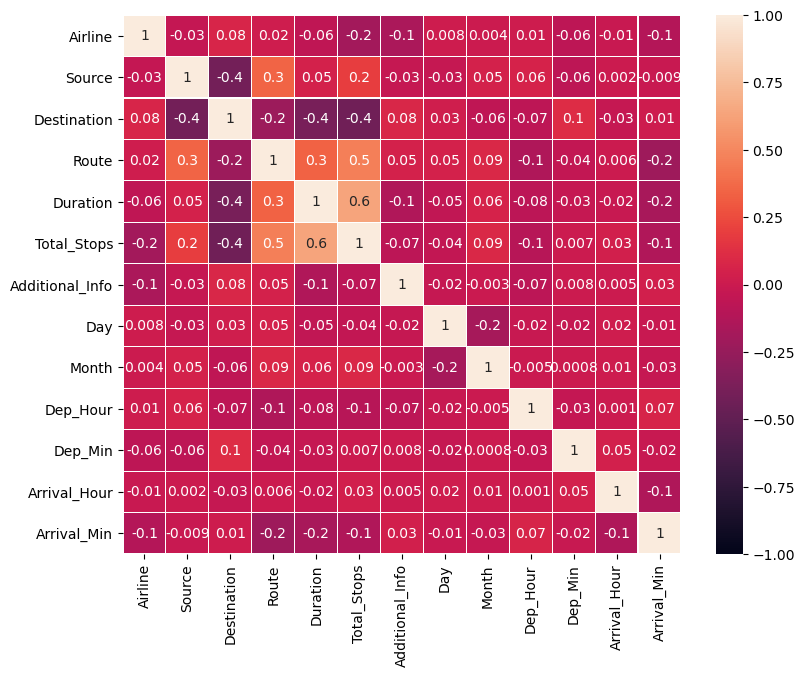

In [99]:
# Lets check correlation of columns using heatmap
plt.figure(figsize=(9,7))
sns.heatmap(df1_test.corr(),linewidths=.1,vmin=-1,vmax=1,fmt='.1g',annot=True)
plt.yticks(rotation=0)

* Same like train dataset test dataset also dont have multicolinearity issue in any features.

# Scaling Test Dataset:

In [100]:
#Importing all required libraries
from sklearn.preprocessing import StandardScaler
scaler1=StandardScaler()
x1=pd.DataFrame(scaler.fit_transform(df1_test), columns=df1_test.columns)

In [101]:
x1.tail()

Airline    Source  Destination     Route  Duration  Total_Stops  \
2654 -1.494857  0.887104    -1.400299 -0.085177  1.741267     0.345942   
2655 -0.362615  0.887104    -1.400299 -0.398906 -0.975514    -1.315164   
2656  0.222668 -0.019721     0.022552  0.803782  0.040319     0.345942   
2657 -1.494857 -0.019721     0.022552  0.803782  1.117616     0.345942   
2658  0.817337 -0.019721     0.022552  0.803782  1.033971     0.345942   

      Additional_Info       Day     Month  Dep_Hour   Dep_Min  Arrival_Hour  \
2654         0.492414 -0.513120  0.254357  1.250992  0.444031      0.916361   
2655         0.492414  1.383202 -0.831368  0.299265  0.005548      0.334256   
2656         0.492414 -1.408646  0.254357  1.401087  1.147359     -1.362264   
2657         0.492414 -1.408646  0.254357 -1.624569 -1.569057      0.770286   
2658         0.492414  0.668870  0.254357 -1.624569  1.300568      0.770286   

      Arrival_Min  
2654     0.177749  
2655     1.535761  
2656     0.177749  
2657    -0.398428  
2658    -0.398428

# Model Building 
            
                using Train Dataset:

In [102]:
# Lets assign values to x and y for training and testing
x=df1.drop("Price",axis=1)
y=df1["Price"]

* Here we have successfully separated the features and target columns in the new train dataset.

# Scaling:

In [103]:
# lets scale the data using Standard Scaler
scaler=StandardScaler()
x2=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x2

Airline    Source  Destination     Route  Duration  Total_Stops  \
0     -0.344316 -1.657629     0.813742 -1.533244 -0.851553    -1.232763   
1     -1.463317  0.889763    -1.159083  0.207804  0.223374     1.793524   
2      0.215184  0.040632    -0.172671  1.198400  1.413094     1.793524   
3     -0.344316  0.889763    -1.159083  0.417930 -0.148108     0.280380   
4     -0.344316 -1.657629     0.813742 -1.293099 -0.298109     0.280380   
...         ...       ...          ...       ...       ...          ...   
10632 -2.022818  0.889763    -1.159083 -0.332521 -0.975513    -1.232763   
10633 -1.463317  0.889763    -1.159083 -0.332521 -0.943457    -1.232763   
10634  0.215184 -1.657629     0.813742 -1.533244 -0.793533    -1.232763   
10635  2.453186 -1.657629     0.813742 -1.533244 -0.912133    -1.232763   
10636 -1.463317  0.040632    -0.172671  0.928237  0.365102     1.793524   

       Additional_Info       Day     Month    dep_hr     dep_m    arr_hr  \
0              0.50866  1.284860 -0.820320  1.650778 -0.235133 -1.799039   
1              0.50866 -0.873712 -1.886866 -1.306011  1.363020 -0.049214   
2              0.50866 -0.760103  1.140006 -0.610296  0.031226 -1.361582   
3              0.50866 -0.873712  1.849486  0.955063 -1.034209  1.408973   
4              0.50866 -1.100930 -1.886866  0.607205  1.363020  1.117336   
...                ...       ...       ...       ...       ...       ...   
10632          0.50866 -0.987321  1.140006  1.128991  1.629379  1.263154   
10633          0.50866  1.625687 -0.407905  1.302920  1.096661  1.408973   
10634          0.50866  1.625687 -0.407905 -0.784224 -0.235133 -0.340851   
10635          0.50866 -1.100930 -1.886866 -0.262438  0.297585  0.096605   
10636          0.50866 -0.873712  1.140006 -0.436367  1.629379  0.825698   

          arr_m  
0     -0.890700  
1     -0.587966  
2      0.017503  
3      0.320238  
4      0.622972  
...         ...  
10632  0.017503  
10633 -0.285231  
10634 -0.285231  
10635 -0.890700  
10636 -0.587966  

[10637 rows x 13 columns]

# Best Random State:

In [104]:
# Lets find best Random State and Accuracy:
# Importing Required libraries
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
max_acc=0
max_rs=0
for i in range(1,250):
    x_train,x_test,y_train,y_test=train_test_split(x2,y,test_size=.27,random_state=i)
    m=RandomForestRegressor()
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>max_acc:
        max_acc=acc
        max_rs=i
print("Best Accuracy : ", max_acc," on Random_state :", max_rs)

* Here best accuracy came 92.8%

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x2,y,test_size=.27,random_state=207)

This project is having Regression problem so we will be using Regression Algorithms

# Regression:

In [ ]:
# Importing all required libraries for model building
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# 1) Kneighbors Regressor (KNN):

In [ ]:
knn=KNN()
knn.fit(x_train,y_train)
pred_k=knn.predict(x_test)
print("R2_score: ",r2_score(y_test,pred_k))
print('mean_squared_error: ',metrics.mean_squared_error(y_test,pred_k))
print('mean_absolute_error: ',metrics.mean_absolute_error(y_test,pred_k))
print('root_mean_squared_error', np.sqrt(metrics.mean_squared_error(y_test,pred_k)))

* Knn is giving 75.7% score

# 2)Gradient Boosting Regressor:

In [ ]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_g=gbr.predict(x_test)
print("R2_score: ",r2_score(y_test,pred_g))
print('mean_squared_error: ',metrics.mean_squared_error(y_test,pred_g))
print('mean_absolute_error: ',metrics.mean_absolute_error(y_test,pred_g))
print('root_mean_squared_error', np.sqrt(metrics.mean_squared_error(y_test,pred_g)))

* Gradient Boosting is giving accuracy of 83.3%

# 3) Decission Tree Regressor:

In [ ]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_d=dtr.predict(x_test)
print("R2_score: ",r2_score(y_test,pred_d))
print('mean_squared_error: ',metrics.mean_squared_error(y_test,pred_d))
print('mean_absolute_error: ',metrics.mean_absolute_error(y_test,pred_d))
print('root_mean_squared_error', np.sqrt(metrics.mean_squared_error(y_test,pred_d)))

* Here Decision Tree regresssor is giving accuracy of 83.66

# 4) Random Forest Regressor:

In [ ]:
rf= RandomForestRegressor()
rf.fit(x_train,y_train)
pred_rf=rf.predict(x_test)
print("R2_score: ",r2_score(y_test,pred_rf))
print('mean_squared_error: ',metrics.mean_squared_error(y_test,pred_rf))
print('mean_absolute_error: ',metrics.mean_absolute_error(y_test,pred_rf))
print('root_mean_squared_error', np.sqrt(metrics.mean_squared_error(y_test,pred_rf)))

Random forest regressor is giving accuracy of 92.71% which is fantastic.

# Cross Validation Score:

In [ ]:
print(cross_val_score(knn,x2,y,cv=5).mean())

In [ ]:
print(cross_val_score(gbr,x2,y,cv=5).mean())

In [ ]:
print(cross_val_score(dtr,x2,y,cv=5).mean())

In [ ]:
print(cross_val_score(rf,x2,y,cv=5).mean())

# After looking all the model Scores and cross validation score, all the models are performing almost same, so i am selecting the one with highest score i.e random forest Regressor as the best model

# Hyper Parameter Tuning:

In [ ]:
# lets import required library
from sklearn.model_selection import GridSearchCV

In [ ]:
parameter={'criterion': ['mse','mae'],
            'n_estimators':[100,200],
            'max_depth': [6,7,8],
            'max_features':['sqrt','log2']}

In [ ]:
gcv=GridSearchCV(RandomForestRegressor(),parameter,cv=5)
gcv.fit(x_train,y_train)

In [ ]:
gcv.best_params_

In [ ]:
#model2=RandomForestRegressor(bootstrap=False,criterion='mae',max_depth=8,max_features='log2',n_estimators=200)
#model2.fit(x_train,y_train)
#pred=model2.predict(x_test)
#print('r2_Score:',r2_score(y_test,pred)*100)
#print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
#print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
#print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

# Saving Model:

In [ ]:
# saving the model as .pkl file
# import required libraries
#import joblib
#joblib.dump(model1,"Flight_price.pkl")

# Loading Model:

In [ ]:
#model1=joblib.load(open("Flight_price.pkl", 'rb'))

# Predicting Flight Prices for Test dataset:

In [ ]:
#Prediction
#prediction = model.predict(x2_test)
#prediction

In [ ]:
#pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Actual"])

In [ ]:
#plt.figure(figsize=(10,5))
#plt.scatter(y_test, prediction, c='crimson')
#p1 = max(max(prediction), max(y_test))
#p2 = min(min(prediction), min(y_test))
#plt.plot([p1, p2], [p1, p2], 'b-')
#plt.xlabel('Actual', fontsize=15)
#plt.ylabel('Predicted', fontsize=15)
#plt.title("XGBRegressor")
#plt.show()
